# FutureCart: AI-Driven Demand Prediction for Smarter Retail.

## Time Series Analysis

Time series can be think as an ordered sequence of values of a variable at equally spaced time intervals.

Time series analysis involves studying patterns, trends and dependencies in the data points to make predictions, understand underlying processes and make informed decisions.

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [2]:
df1=pd.read_excel(r'C:\Users\abhig\Documents\Springboard\FutureCart\Datasets\ProductA.xlsx')
df2=pd.read_excel(r'C:\Users\abhig\Documents\Springboard\FutureCart\Datasets\ProductA_google_clicks.xlsx')
df3=pd.read_excel(r'C:\Users\abhig\Documents\Springboard\FutureCart\Datasets\ProductA_fb_impressions.xlsx')

new_df1=pd.merge(df1, df2, on='Day Index', how='left')

df=pd.merge(new_df1, df3, on='Day Index', how='left')# datset combining all 3 datasets

df is the master data.

In [3]:
df.head()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


In [4]:
df.dtypes

Day Index      datetime64[ns]
Quantity                int64
Clicks                  int64
Impressions             int64
dtype: object

In [5]:
df.describe()

,Day Index,Quantity,Clicks,Impressions
count,212,212.000000,212.00000,212.000000
mean,2022-03-16 12:00:00,17.542453,358.20283,1531.702830
min,2021-12-01 00:00:00,5.000000,60.00000,620.000000
25%,2022-01-22 18:00:00,13.750000,154.00000,1209.750000
50%,2022-03-16 12:00:00,17.000000,402.50000,1460.000000
75%,2022-05-08 06:00:00,21.000000,492.75000,1862.000000
max,2022-06-30 00:00:00,38.000000,726.00000,2707.000000
std,NaN,5.790423,164.52160,440.660783


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Clicks       212 non-null    int64         
 3   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB


## Check Null Values

In [7]:
df.isnull().sum()

Day Index      0
Quantity       0
Clicks         0
Impressions    0
dtype: int64

Here there are no null values.

Lets check it using heatmap.

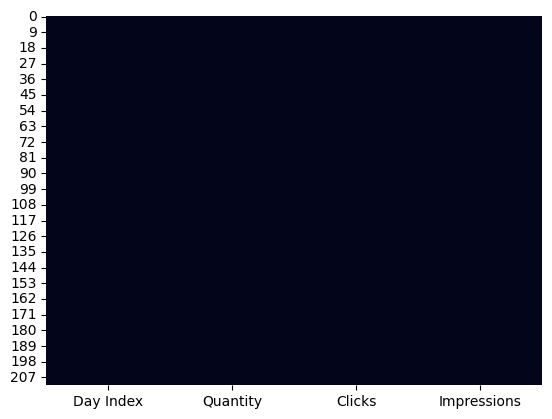

<Figure size 1200x600 with 0 Axes>

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.figure(figsize=(12, 6))
plt.show() # The below figure indicates that there are no null values in the dataset

There are no null values in the dataset.

In [9]:
df.dtypes

Day Index      datetime64[ns]
Quantity                int64
Clicks                  int64
Impressions             int64
dtype: object

Here , we don't have any column of object datatype. So there won't be any garbage values.

## Plotting for understanding the distribution

Lets try to plot a histogram of the dataset and see how it is distributed.

Lets consider "Quantity" column.

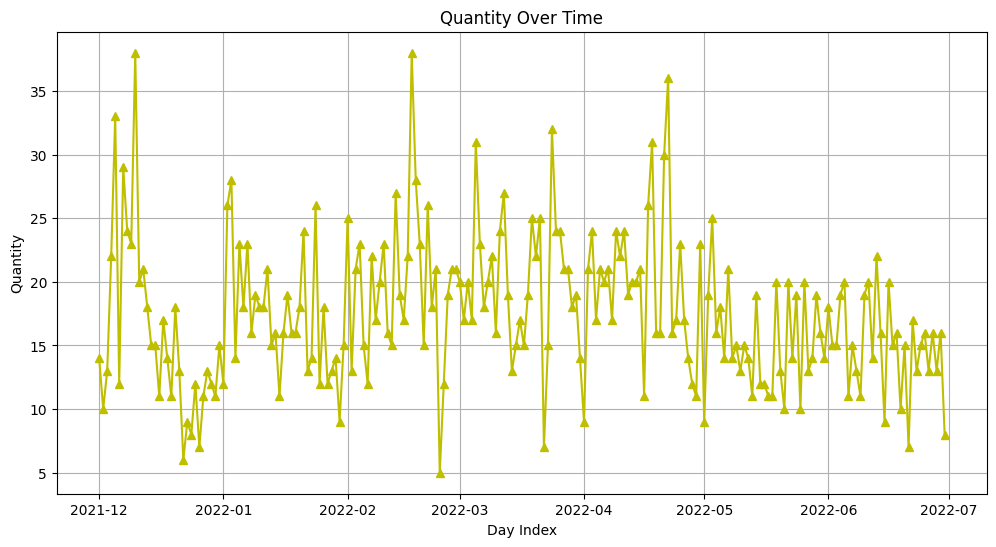

In [10]:
df['Day Index'] = pd.to_datetime(df['Day Index']) #converting into datetimeformat

plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Quantity'], marker='^', linestyle='-', color='y')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.title('Quantity Over Time')
plt.grid(True)
plt.show()

You can see that, at mid-december, there is a huge growth in quantity but it dropped to the bottom at the end of the month. This happened again in the cases of February and April.

Lets try to look at it on weekly-basis.

In [11]:
df.set_index('Day Index', inplace=True) # keeping Day Index as the index for resampling

df_weekly = df['Quantity'].resample('W').sum() # Resampling data to weekly and aggregating quantity

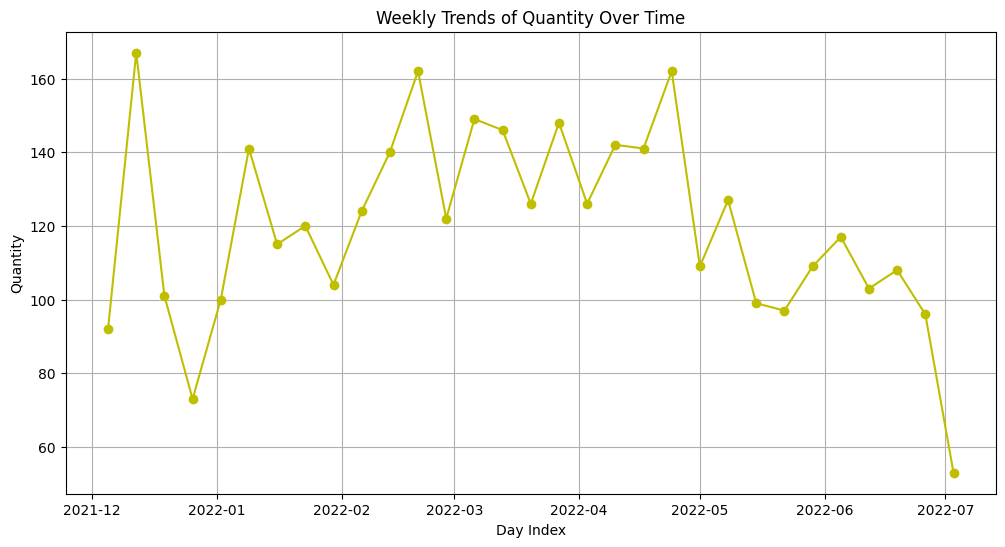

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly.values, marker='o', linestyle='-', color='y') # index-Day Index , values-Weekly distributed Quantity
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.title('Weekly Trends of Quantity Over Time')
plt.grid(True)
plt.show()

In [13]:
df.columns

Index(['Quantity', 'Clicks', 'Impressions'], dtype='object')

In [14]:
df.reset_index(inplace=True) # Adding index back

df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions'], dtype='object')

In [15]:
df.set_index('Day Index', inplace=True) # keeping date as the index for resampling

df_weekly = df['Clicks'].resample('W').sum() # Resampling data to weekly and aggregating clicks

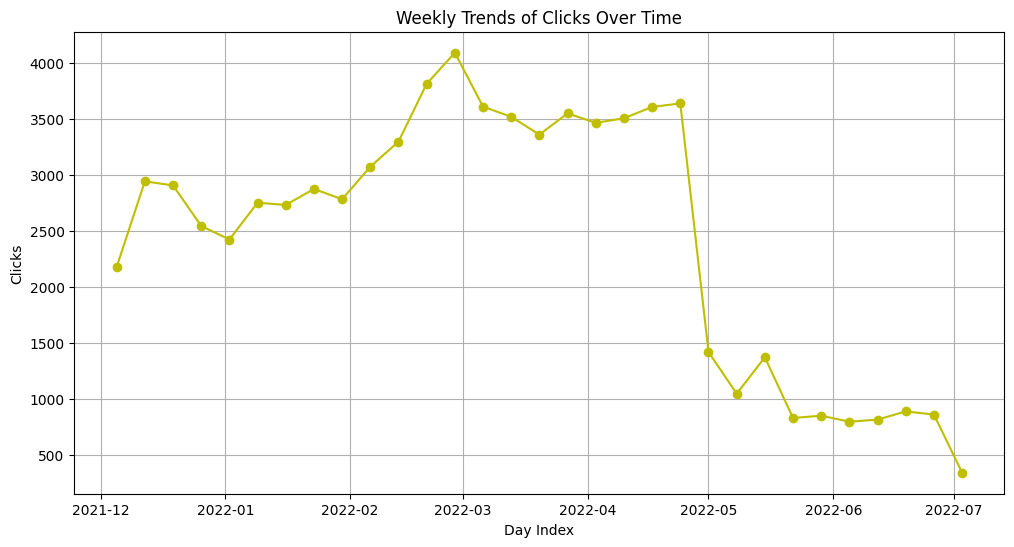

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly.values, marker='o', linestyle='-', color='y') # index-Day Index , values-Weekly distributed clicks
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.title('Weekly Trends of Clicks Over Time')
plt.grid(True)
plt.show()

You can see that there is huge down in number of clicks in the period of April-May.

In [17]:
df.reset_index(inplace=True) # Adding index back
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions'], dtype='object')

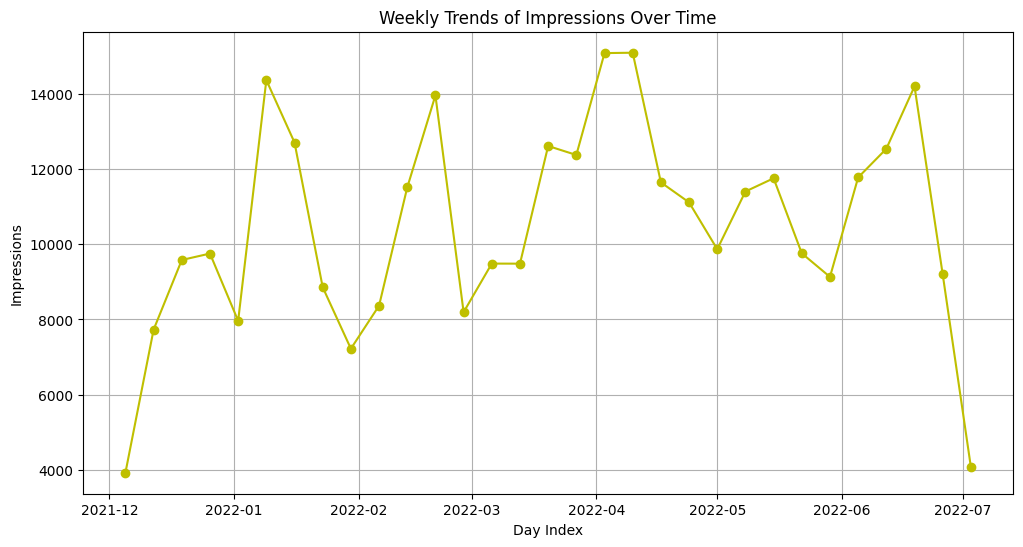

In [18]:
df.set_index('Day Index', inplace=True) # keeping date as the index for resampling

df_weekly = df['Impressions'].resample('W').sum() # Resampling data to weekly and aggregating impressions

plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly.values, marker='o', linestyle='-', color='y') # index-Day Index , values-Weekly distributed Impressions
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.title('Weekly Trends of Impressions Over Time')
plt.grid(True)
plt.show()

We can see that, after an increase in impressions , there is an immediate decrease as well. we may as well say that, there is more possibility in higher impressions at the start of the month than the end of the month. 

## Scatter-plot to understand the relationship

In [19]:
df.reset_index(inplace=True)

df.set_index('Day Index', inplace=True)
df_weekly = df.resample('W').sum() # Resample data to weekly frequency and aggregate using sum

Text(0, 0.5, 'Clicks')

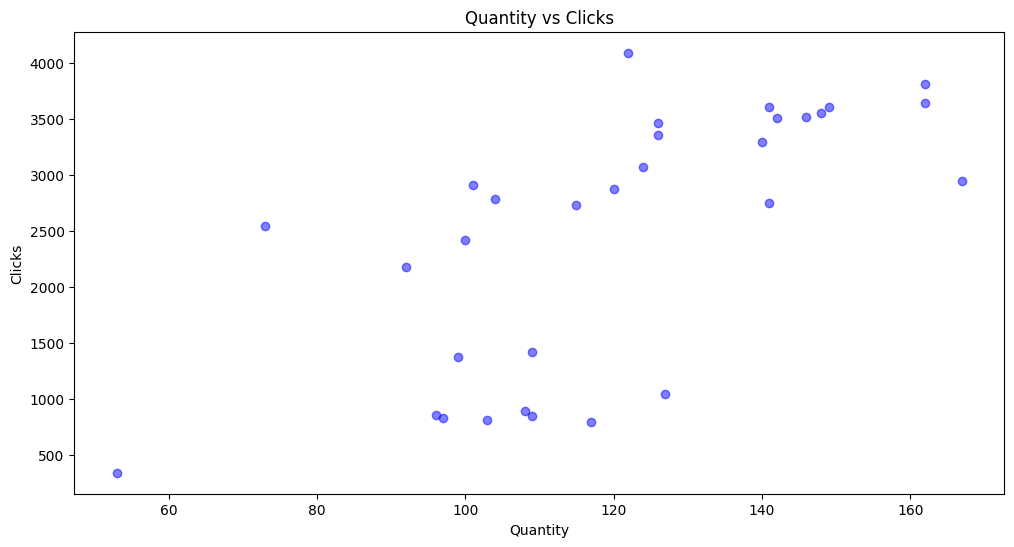

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(df_weekly['Quantity'], df_weekly['Clicks'], color='blue', alpha=0.5)
plt.title('Quantity vs Clicks')
plt.xlabel('Quantity')
plt.ylabel('Clicks')

Text(0, 0.5, 'Impressions')

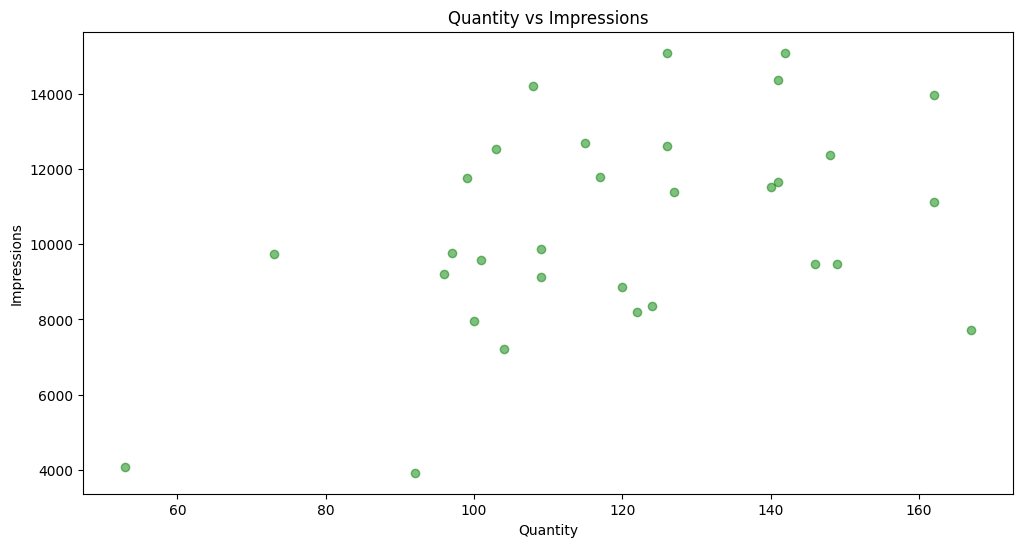

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(df_weekly['Quantity'], df_weekly['Impressions'], color='green', alpha=0.5)
plt.title('Quantity vs Impressions')
plt.xlabel('Quantity')
plt.ylabel('Impressions')

Text(0, 0.5, 'Impressions')

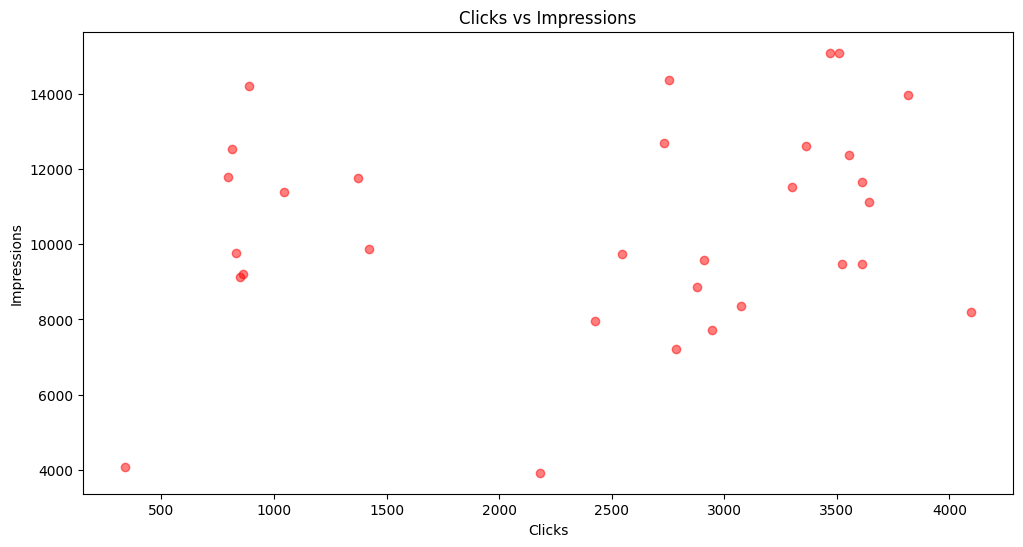

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(df_weekly['Clicks'], df_weekly['Impressions'], color='red', alpha=0.5)
plt.title('Clicks vs Impressions')
plt.xlabel('Clicks')
plt.ylabel('Impressions')

Lets interpret the relationships using correlation.

**Correlation Matrix:** A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

In [23]:
df.reset_index(inplace=True) # Adding index back
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions'], dtype='object')

In [24]:
df['Day Index'] = pd.to_datetime(df['Day Index']) #converting into datetimeformat

df.set_index('Day Index', inplace=True)

# Resample data to weekly frequency and aggregate using sum
df_weekly = df.resample('W').sum()

# Check correlation between columns
correlation = df_weekly.corr()
print("Correlation matrix:\n", correlation)

Correlation matrix:
              Quantity    Clicks  Impressions
Quantity     1.000000  0.666932     0.460122
Clicks       0.666932  1.000000     0.200396
Impressions  0.460122  0.200396     1.000000


Lets plot the correlation matrix using heatmap

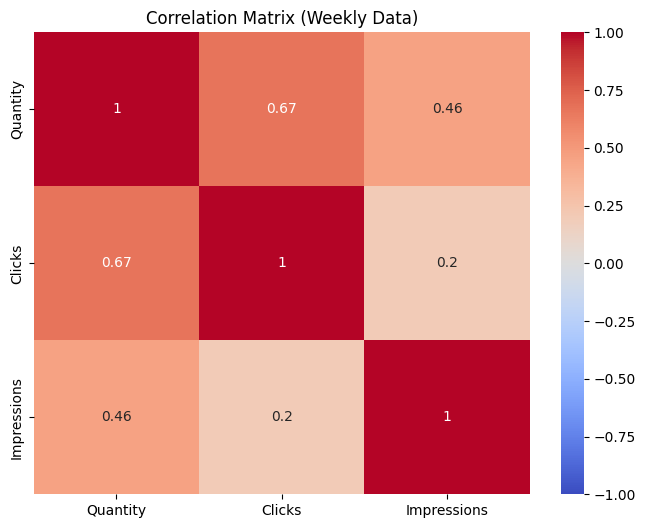

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix (Weekly Data)')
plt.show()

## Check Outliers

C:\Users\abhig\AppData\Local\Temp\ipykernel_1724\1215081002.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Quantity'], df['Clicks'], df['Impressions']], labels=['Quantity', 'Clicks', 'Impressions'])


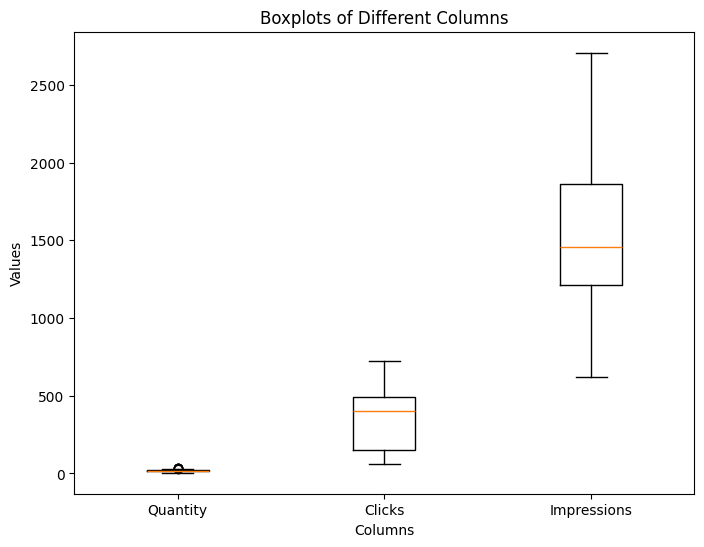

In [26]:
plt.figure(figsize=(8, 6))
plt.boxplot([df['Quantity'], df['Clicks'], df['Impressions']], labels=['Quantity', 'Clicks', 'Impressions'])
plt.title("Boxplots of Different Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

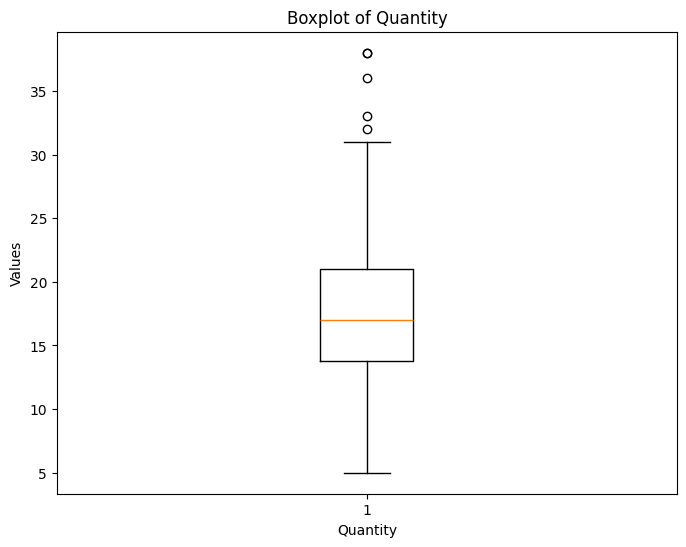

In [27]:
# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Quantity'])
plt.title("Boxplot of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Values")
plt.show()

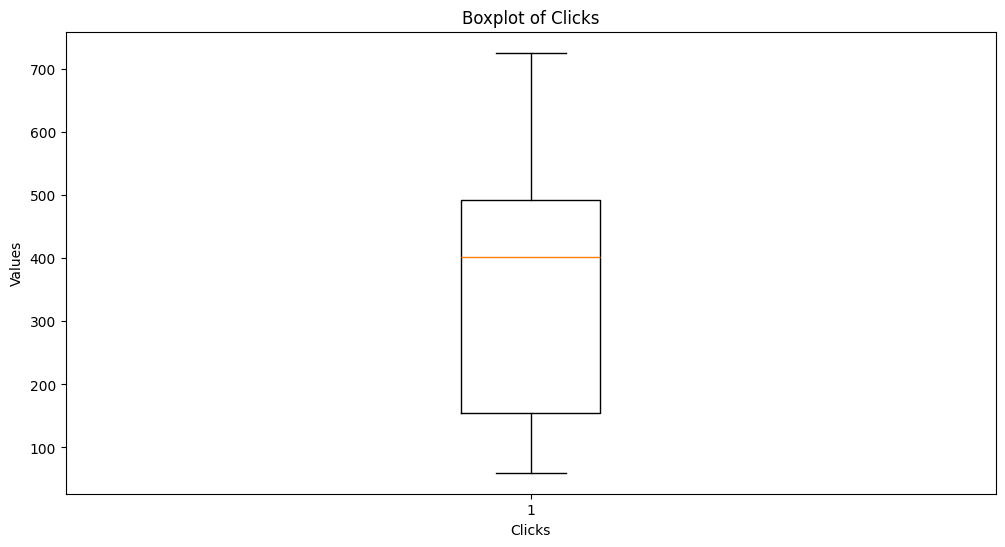

In [28]:
# Plot boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df['Clicks'])
plt.title("Boxplot of Clicks")
plt.xlabel("Clicks")
plt.ylabel("Values")
plt.show()

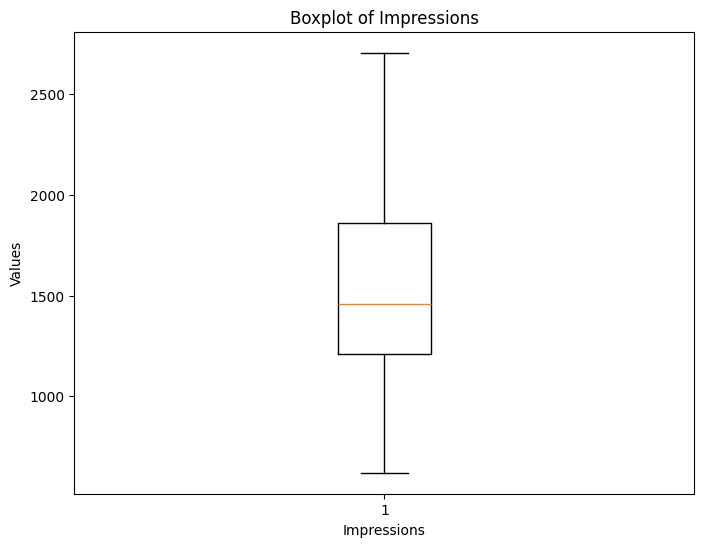

In [29]:
# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Impressions'])
plt.title("Boxplot of Impressions")
plt.xlabel("Impressions")
plt.ylabel("Values")
plt.show()

## Removing Outliers

We can do it using Inter-Quartile Range 

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print("Original DataFrame:")
print(df)
print("\nDataFrame after removing outliers:")
print(df_clean)

Original DataFrame:
            Quantity  Clicks  Impressions
Day Index                                
2021-12-01        14     445          620
2021-12-02        10     433          890
2021-12-03        13     424          851
2021-12-04        22     427          881
2021-12-05        33     451          678
...              ...     ...          ...
2022-06-26        13     114         1218
2022-06-27        16     106         1311
2022-06-28        13     109          885
2022-06-29        16      60         1000
2022-06-30         8      65          875

[212 rows x 3 columns]

DataFrame after removing outliers:
            Quantity  Clicks  Impressions
Day Index                                
2021-12-01        14     445          620
2021-12-02        10     433          890
2021-12-03        13     424          851
2021-12-04        22     427          881
2021-12-06        12     429          995
...              ...     ...          ...
2022-06-26        13     114         1

C:\Users\abhig\AppData\Local\Temp\ipykernel_1724\2256493066.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_clean['Quantity'], df_clean['Clicks'], df_clean['Impressions']], labels=['Quantity', 'Clicks', 'Impressions'])


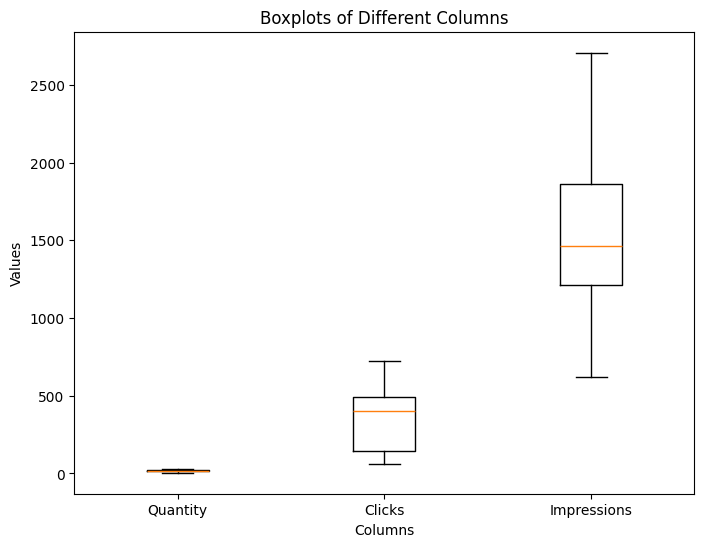

In [31]:
plt.figure(figsize=(8, 6))
plt.boxplot([df_clean['Quantity'], df_clean['Clicks'], df_clean['Impressions']], labels=['Quantity', 'Clicks', 'Impressions'])
plt.title("Boxplots of Different Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

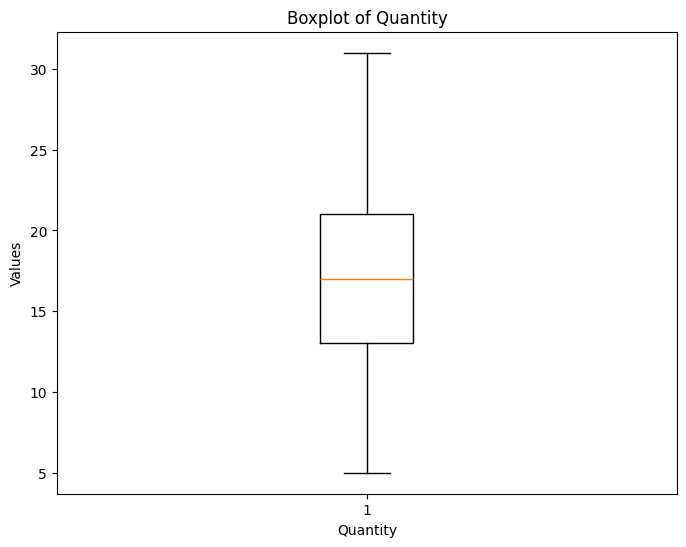

In [32]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['Quantity'])
plt.title("Boxplot of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Values")
plt.show()

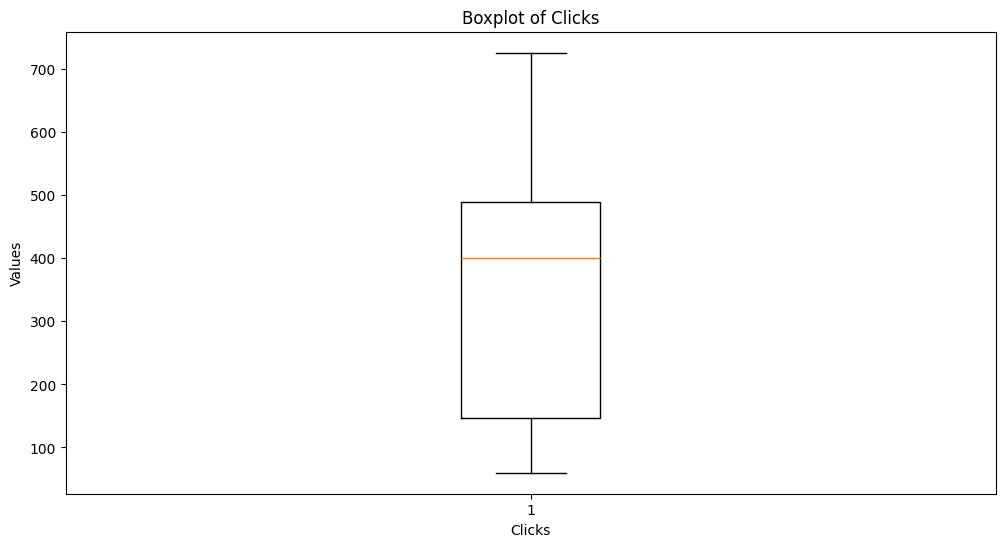

In [33]:
# Plot boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df_clean['Clicks'])
plt.title("Boxplot of Clicks")
plt.xlabel("Clicks")
plt.ylabel("Values")
plt.show()

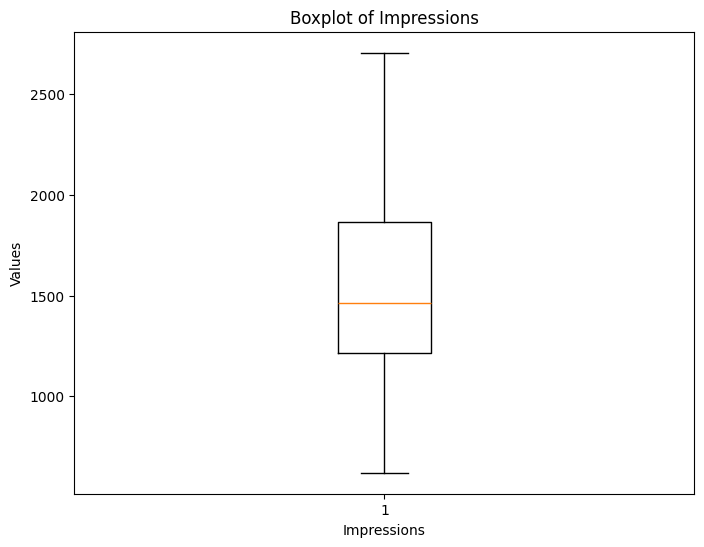

In [34]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['Impressions'])
plt.title("Boxplot of Impressions")
plt.xlabel("Impressions")
plt.ylabel("Values")
plt.show()

In [35]:
df=df_clean
df.head()

,Quantity,Clicks,Impressions
Day Index,,,
2021-12-01,14,445,620
2021-12-02,10,433,890
2021-12-03,13,424,851
2021-12-04,22,427,881
2021-12-06,12,429,995


df is the final data with no outliers and missing values

## Feature Engineering

Feature Engineering is the process of creating new features or transforming existing features to improve the performance of a machine-learning model. It involves selecting relevant information from raw data and transforming it into a format that can be easily understood by a model. The goal is to improve model accuracy by providing more meaningful and relevant information.

In [36]:
df.loc[:, 'log_quantity'] = np.log1p(df['Quantity'])
df.loc[:, 'log_clicks'] = np.log1p(df['Clicks'])
df.loc[:, 'log_impressions'] = np.log1p(df['Impressions'])

In [37]:
df.head()

,Quantity,Clicks,Impressions,log_quantity,log_clicks,log_impressions
Day Index,,,,,,
2021-12-01,14,445,620,2.708050,6.100319,6.431331
2021-12-02,10,433,890,2.397895,6.073045,6.792344
2021-12-03,13,424,851,2.639057,6.052089,6.747587
2021-12-04,22,427,881,3.135494,6.059123,6.782192
2021-12-06,12,429,995,2.564949,6.063785,6.903747


In [38]:
df.reset_index(inplace=True) # Adding index back
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions', 'log_quantity',
       'log_clicks', 'log_impressions'],
      dtype='object')

Lets try to add other columns.

In [39]:
df.loc[:, 'Day'] = df['Day Index'].dt.day_name() 
df.loc[:, 'Day of Week'] = df['Day Index'].dt.dayofweek
df.loc[:, 'is_weekend'] = df['Day of Week'] >= 5
df.loc[:, 'Month'] = df['Day Index'].dt.month_name()
df.loc[:, 'Quarter'] = df['Day Index'].dt.quarter
df.loc[:, 'Year'] = df['Day Index'].dt.year
df.loc[:, 'Day of Month'] = df['Day Index'].dt.day
df.loc[:, 'Week of Year'] = df['Day Index'].dt.isocalendar().week

In [40]:
df.head()

,Day Index,Quantity,Clicks,Impressions,log_quantity,log_clicks,log_impressions,Day,Day of Week,is_weekend,Month,Quarter,Year,Day of Month,Week of Year
0,2021-12-01,14,445,620,2.708050,6.100319,6.431331,Wednesday,2,False,December,4,2021,1,48
1,2021-12-02,10,433,890,2.397895,6.073045,6.792344,Thursday,3,False,December,4,2021,2,48
2,2021-12-03,13,424,851,2.639057,6.052089,6.747587,Friday,4,False,December,4,2021,3,48
3,2021-12-04,22,427,881,3.135494,6.059123,6.782192,Saturday,5,True,December,4,2021,4,48
4,2021-12-06,12,429,995,2.564949,6.063785,6.903747,Monday,0,False,December,4,2021,6,49


So , the columns we added to the dataset are :
- The day of that particular date
- The day number according to the week
- If that particular date is a weekend or not
- The month to which the date belongs to
- The quarter to which the date belongs to
- Year of the date
- The day number according to the month
- The week number according to the year

## Some Basic plots after removing oultiers and adding additional columns

In [41]:
df.set_index('Day Index', inplace=True)
df_weekly = df.resample('W').sum() # Resample data to weekly frequency and aggregate using sum

Text(0, 0.5, 'Clicks')

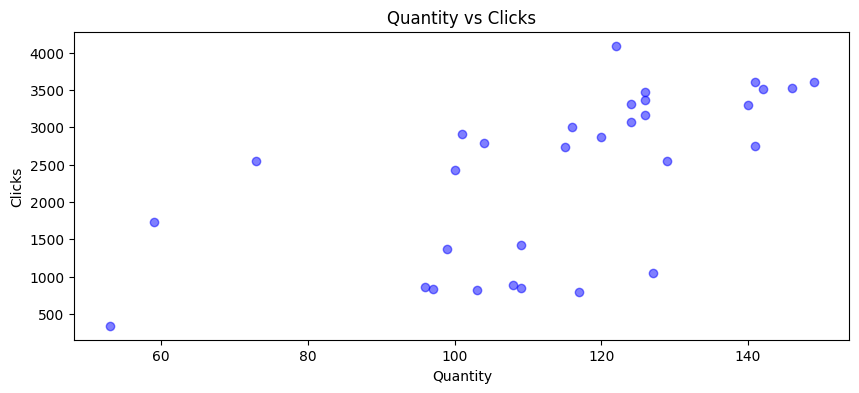

In [42]:
plt.figure(figsize=(10,4))
plt.scatter(df_weekly['Quantity'], df_weekly['Clicks'], color='blue', alpha=0.5)
plt.title('Quantity vs Clicks')
plt.xlabel('Quantity')
plt.ylabel('Clicks')

Text(0, 0.5, 'Impressions')

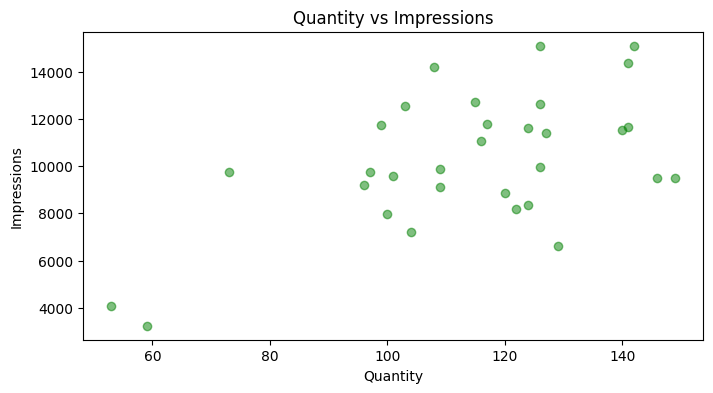

In [43]:
plt.figure(figsize=(8,4))
plt.scatter(df_weekly['Quantity'], df_weekly['Impressions'], color='green', alpha=0.5)
plt.title('Quantity vs Impressions')
plt.xlabel('Quantity')
plt.ylabel('Impressions')

Text(0, 0.5, 'Impressions')

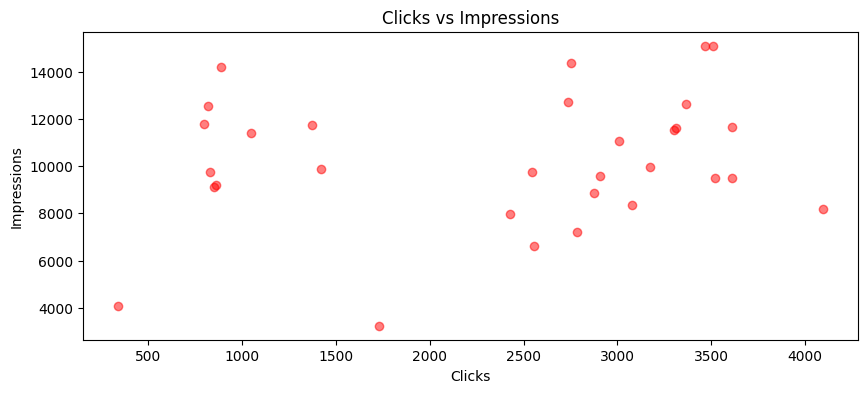

In [44]:
plt.figure(figsize=(10,4))
plt.scatter(df_weekly['Clicks'], df_weekly['Impressions'], color='red', alpha=0.5)
plt.title('Clicks vs Impressions')
plt.xlabel('Clicks')
plt.ylabel('Impressions')

In [45]:
df.reset_index(inplace=True) # Adding index back
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions', 'log_quantity',
       'log_clicks', 'log_impressions', 'Day', 'Day of Week', 'is_weekend',
       'Month', 'Quarter', 'Year', 'Day of Month', 'Week of Year'],
      dtype='object')

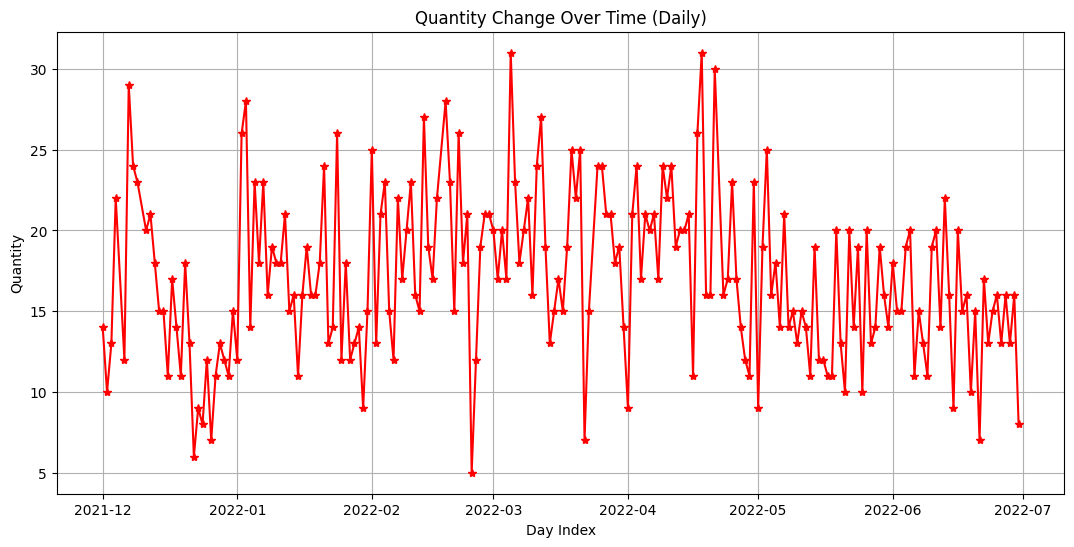

In [46]:
plt.figure(figsize=(13, 6))
plt.plot(df['Day Index'], df['Quantity'], marker='*', linestyle='-', color='r')
plt.title('Quantity Change Over Time (Daily)')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

The plot is a representation of how Quantity changes over time on daily basis. 

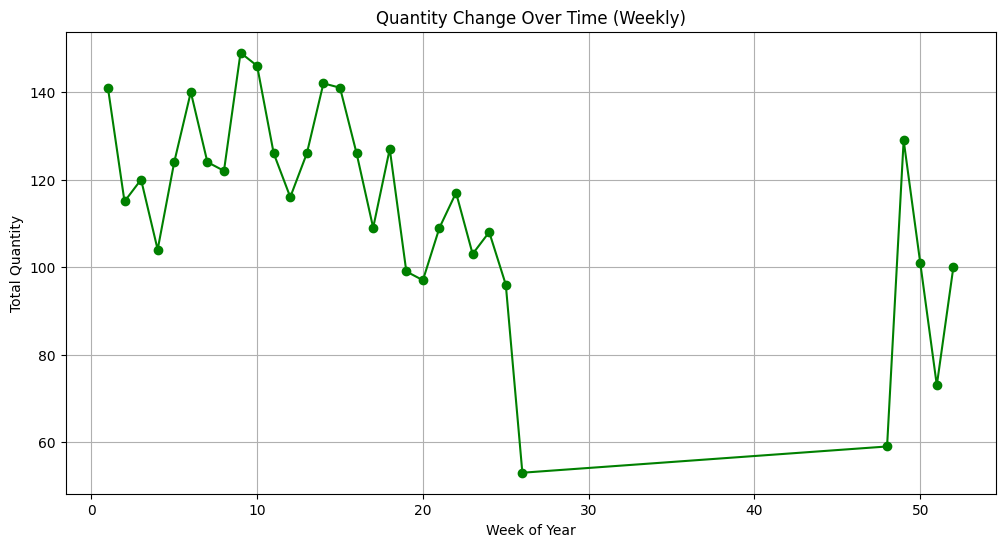

In [47]:
# Group by 'week of year' and calculate the sum or average of 'Quantity'
weekly_quantity = df.groupby('Week of Year')['Quantity'].sum()

# Line plot for weekly change in Quantity
plt.figure(figsize=(12, 6))
plt.plot(weekly_quantity.index, weekly_quantity, marker='o', linestyle='-', color='g')
plt.title('Quantity Change Over Time (Weekly)')
plt.xlabel('Week of Year')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

The plot is a representation of how Quantity changes over time on weekly basis. 

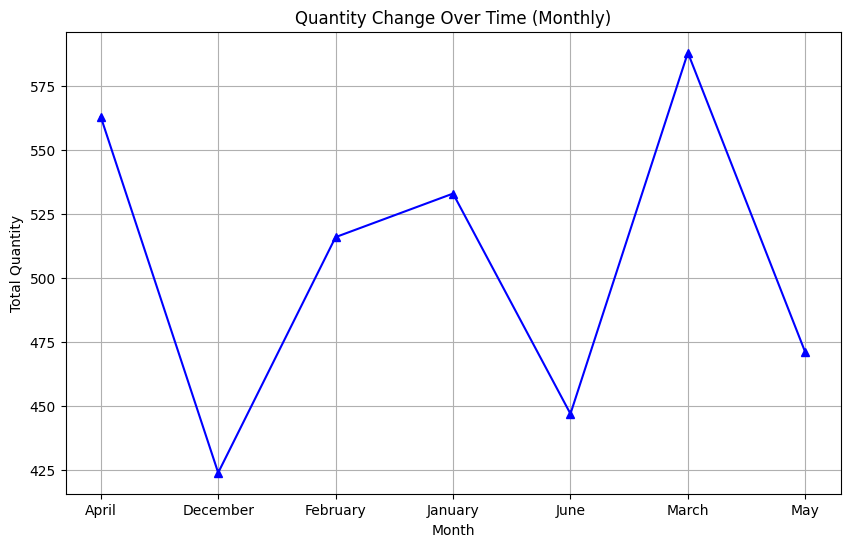

In [48]:
# Group by 'month' and calculate the sum or average of 'Quantity'
monthly_quantity = df.groupby('Month')['Quantity'].sum()

# Line plot for monthly change in Quantity
plt.figure(figsize=(10, 6))
plt.plot(monthly_quantity.index, monthly_quantity, marker='^', linestyle='-', color='b')
plt.title('Quantity Change Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

The plot is a representation of how Quantity changes over time on monthly basis. 

C:\Users\abhig\AppData\Local\Temp\ipykernel_1724\3520032583.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day', y='Quantity', data=df, estimator='mean', ci=None, palette='viridis')
C:\Users\abhig\AppData\Local\Temp\ipykernel_1724\3520032583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Quantity', data=df, estimator='mean', ci=None, palette='viridis')


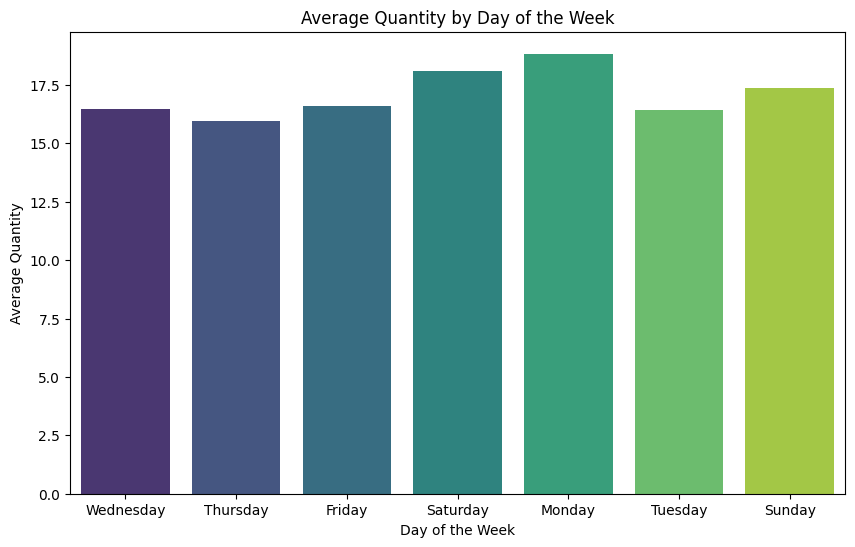

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Quantity', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Quantity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Quantity')
plt.show()

C:\Users\abhig\AppData\Local\Temp\ipykernel_1724\3572884264.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day', y='Clicks', data=df, estimator='mean', ci=None, palette='viridis')
C:\Users\abhig\AppData\Local\Temp\ipykernel_1724\3572884264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Clicks', data=df, estimator='mean', ci=None, palette='viridis')


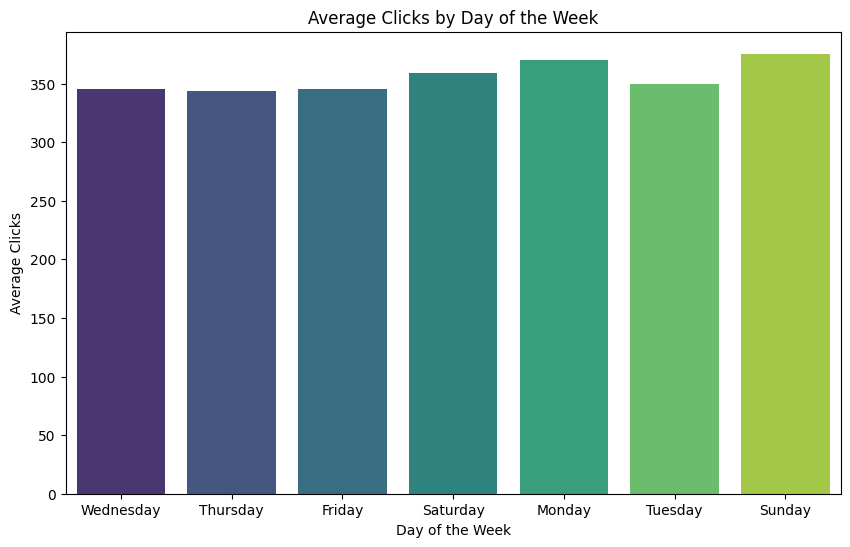

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Clicks', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Clicks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Clicks')
plt.show()

C:\Users\abhig\AppData\Local\Temp\ipykernel_1724\2580512211.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day', y='Impressions', data=df, estimator='mean', ci=None, palette='viridis')
C:\Users\abhig\AppData\Local\Temp\ipykernel_1724\2580512211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Impressions', data=df, estimator='mean', ci=None, palette='viridis')


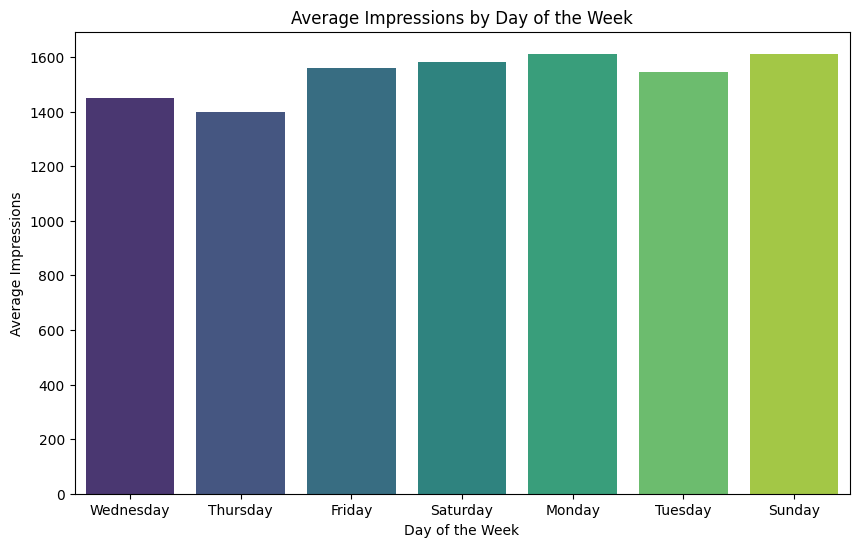

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Impressions', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Impressions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Impressions')
plt.show()

C:\Users\abhig\AppData\Local\Temp\ipykernel_1724\815498009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_weekend', data=df, palette='Set2')


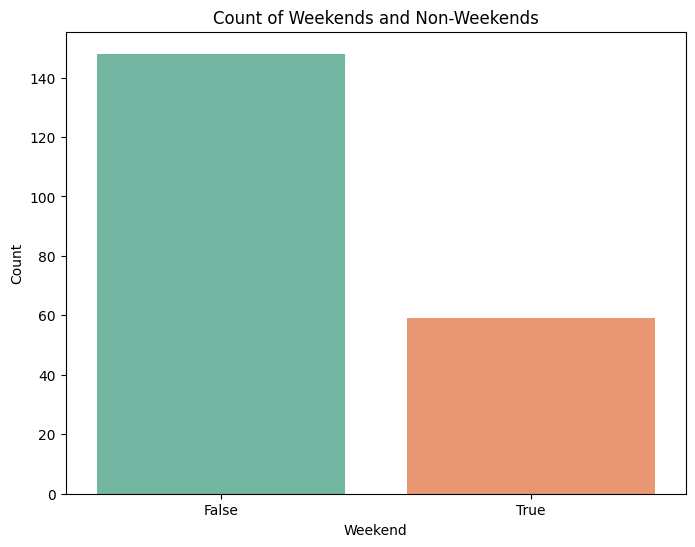

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_weekend', data=df, palette='Set2')
plt.title('Count of Weekends and Non-Weekends')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.show()


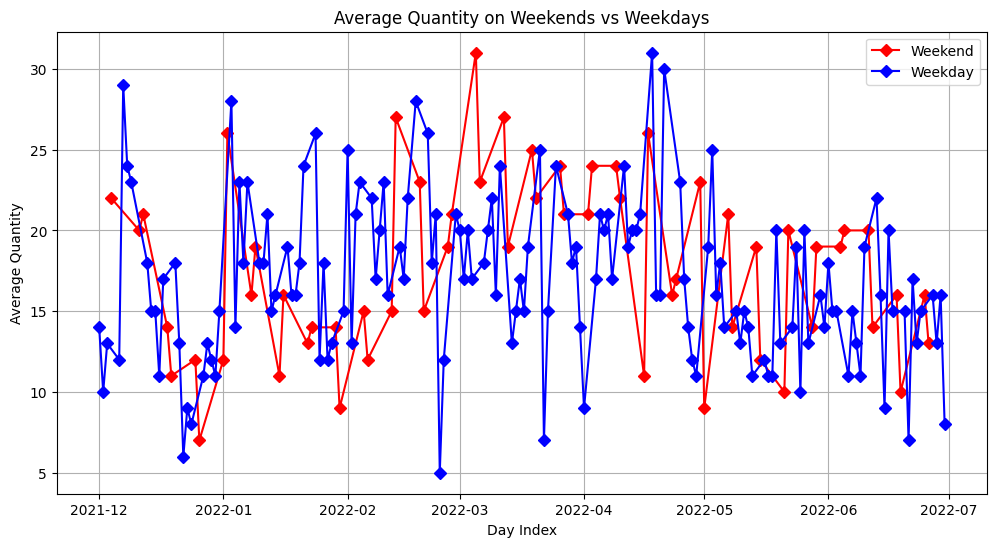

In [53]:
weekend_data = df[df['is_weekend'] == 1].groupby('Day Index')['Quantity'].mean()
weekday_data = df[df['is_weekend'] == 0].groupby('Day Index')['Quantity'].mean()

plt.figure(figsize=(12, 6))
plt.plot(weekend_data.index, weekend_data.values, label='Weekend', color='red', marker='D')
plt.plot(weekday_data.index, weekday_data.values, label='Weekday', color='blue', marker='D')
plt.title('Average Quantity on Weekends vs Weekdays')
plt.xlabel('Day Index')
plt.ylabel('Average Quantity')
plt.legend()
plt.grid(True)
plt.show()

This plot provides insights into how quantities differ on weekends and weekdays. It’s useful for spotting patterns that might be tied to time-based factors or other seasonal trends.Lets try to smoothen the data for clear visulization.

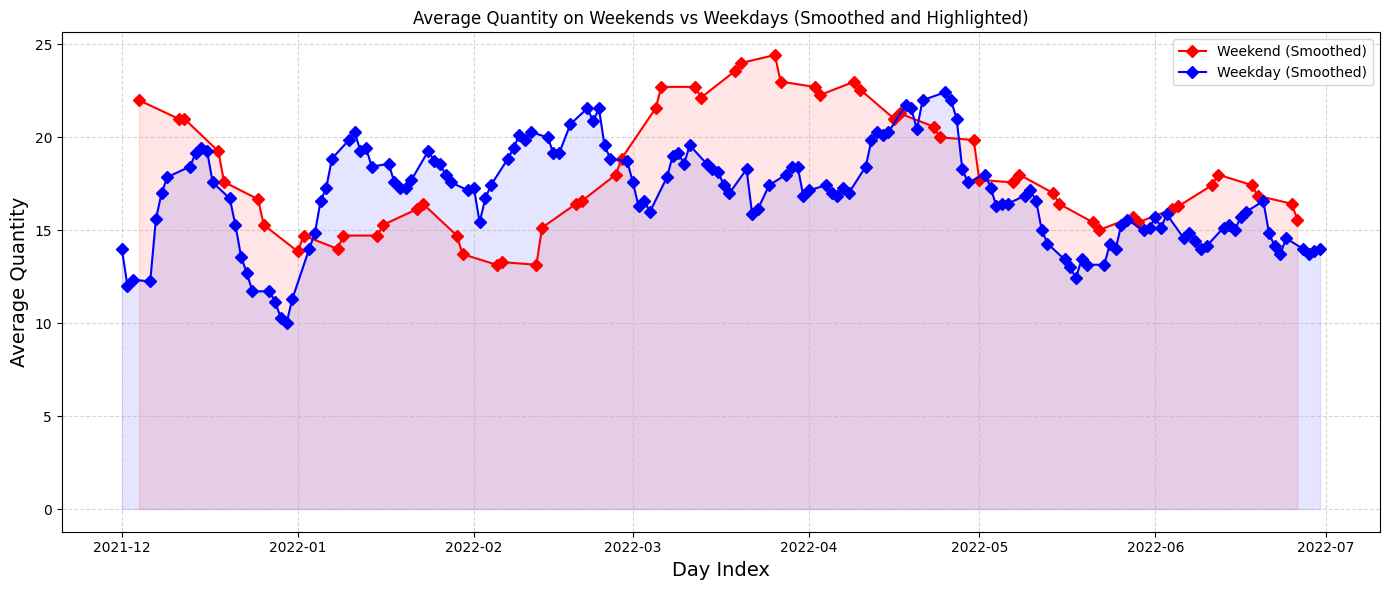

In [54]:
# Calculate weekend and weekday average quantities
weekend_data = df[df['is_weekend'] == 1].groupby('Day Index')['Quantity'].mean()
weekday_data = df[df['is_weekend'] == 0].groupby('Day Index')['Quantity'].mean()

weekend_smoothed = weekend_data.rolling(window=7, min_periods=1).mean() # window = 7 -> for 7 days of week
weekday_smoothed = weekday_data.rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(14, 6))

# Plotting the smoothed weekend and weekday data with shaded areas for clarity
plt.plot(weekend_smoothed.index, weekend_smoothed.values, label='Weekend (Smoothed)', color='red', marker='D')
plt.plot(weekday_smoothed.index, weekday_smoothed.values, label='Weekday (Smoothed)', color='blue', marker='D')
plt.fill_between(weekend_smoothed.index, weekend_smoothed.values, color='red', alpha=0.1)
plt.fill_between(weekday_smoothed.index, weekday_smoothed.values, color='blue', alpha=0.1)

plt.title('Average Quantity on Weekends vs Weekdays (Smoothed and Highlighted)')
plt.xlabel('Day Index', fontsize=14)
plt.ylabel('Average Quantity', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In certain periods, like around March and April, the weekend and weekday averages diverge, with weekends having higher average quantities. This suggests potential seasonality or events affecting weekend activity more significantly than weekdays.

In [55]:
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

corr_matrix = numeric_columns.corr()
print(corr_matrix)

                 Quantity    Clicks  Impressions  log_quantity  log_clicks  \
Quantity         1.000000  0.374935     0.191357      0.979745    0.335871   
Clicks           0.374935  1.000000     0.038807      0.333916    0.980365   
Impressions      0.191357  0.038807     1.000000      0.202109    0.033529   
log_quantity     0.979745  0.333916     0.202109      1.000000    0.300065   
log_clicks       0.335871  0.980365     0.033529      0.300065    1.000000   
log_impressions  0.190056  0.016184     0.985583      0.200856    0.009986   
Day of Week     -0.013372  0.015678     0.027884     -0.022938    0.019121   
Quarter         -0.265235 -0.223875    -0.252880     -0.278271   -0.175269   
Year             0.196621 -0.095736     0.335144      0.218593   -0.165180   
Day of Month    -0.238449 -0.117320    -0.236272     -0.245868   -0.136572   
Week of Year    -0.271985 -0.249682    -0.277756     -0.288999   -0.206502   

                 log_impressions  Day of Week   Quarter      Ye

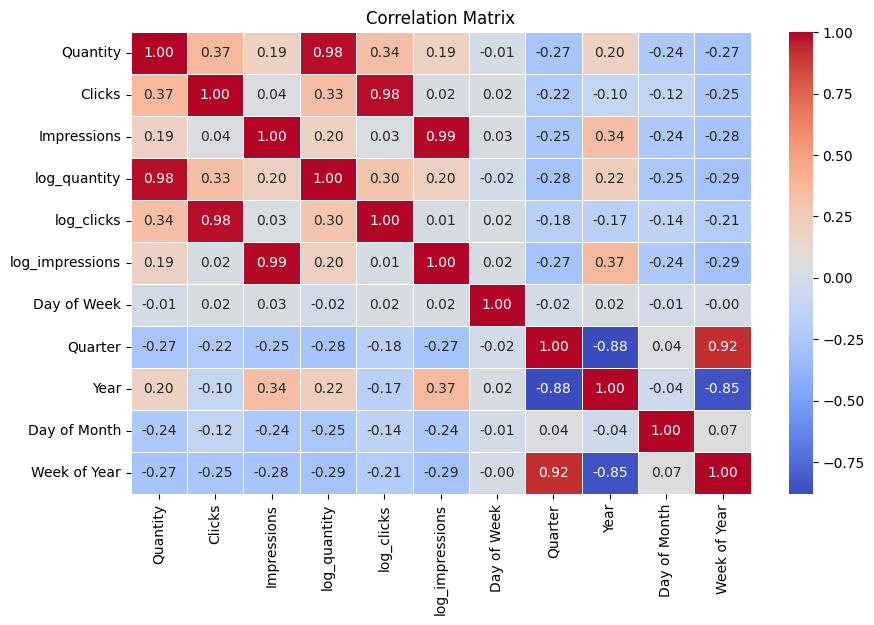

In [56]:
# Create the heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

# Milestone 2

## Time Series Modelling

<Axes: >

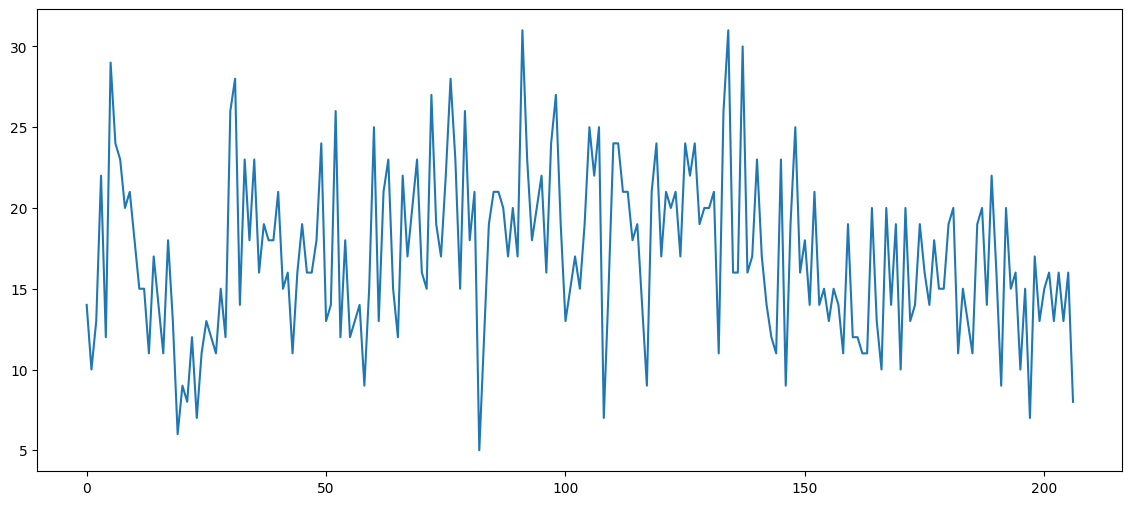

In [57]:
df['Quantity'].plot(figsize=(14,6))

## Stationarity Check

In [58]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Quantity']) #storing the test results in result

print('ADF Statistic:', result[0])  # Test statistic; helps determine stationarity
print('p-value:', result[1])       # p-value; used to decide on rejecting the null hypothesis
#print('Critical Values:', result[4])  # Critical values for different significance levels

for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

print('Output: ')
if result[1] < 0.05:
    print("    Reject the null hypothesis: The series is stationary.")
else:
    print("    Fail to reject the null hypothesis: The series is non-stationary.")

ADF Statistic: -4.516446455668561
p-value: 0.00018361360605353083
Critical Value (1%): -3.462980134086401
Critical Value (5%): -2.875885461947131
Critical Value (10%): -2.5744164898444515
Output: 
    Reject the null hypothesis: The series is stationary.


## Plotting ACF and PACF

Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots are essential tools for analyzing dependencies in a time series, especially when identifying the parameters for ARIMA models or understanding the structure of your data.

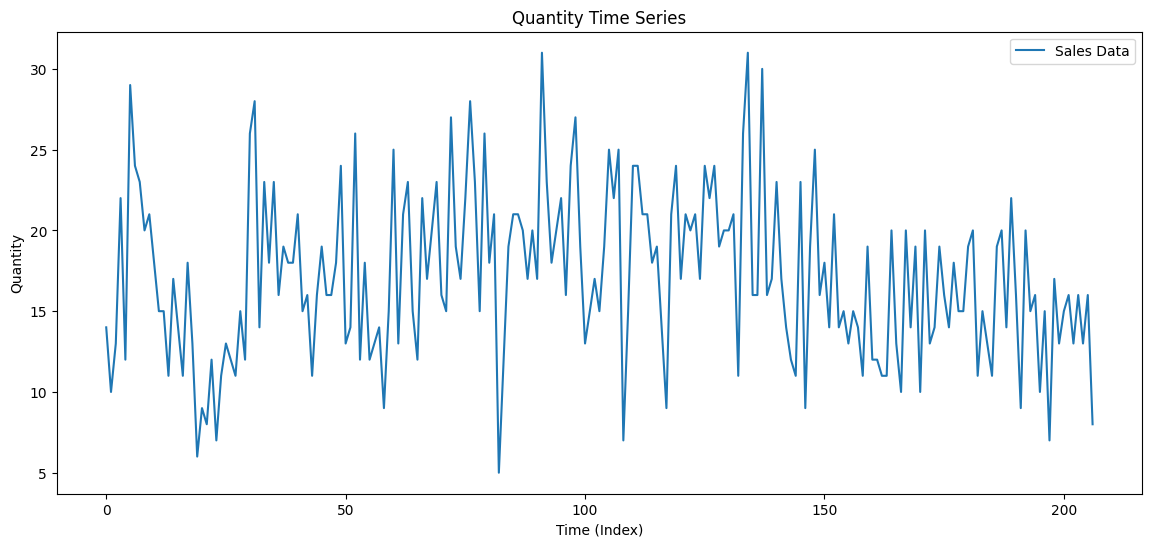

<Figure size 1000x600 with 0 Axes>

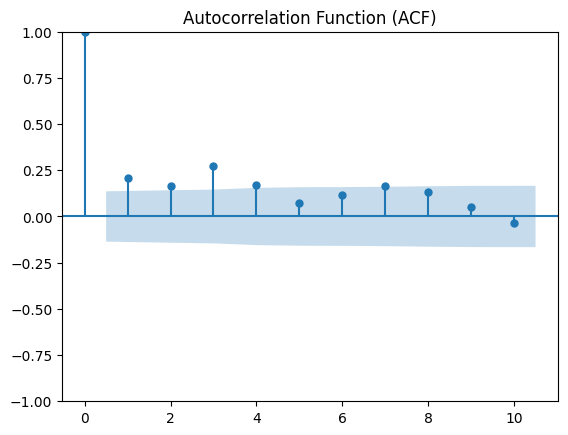

<Figure size 1000x600 with 0 Axes>

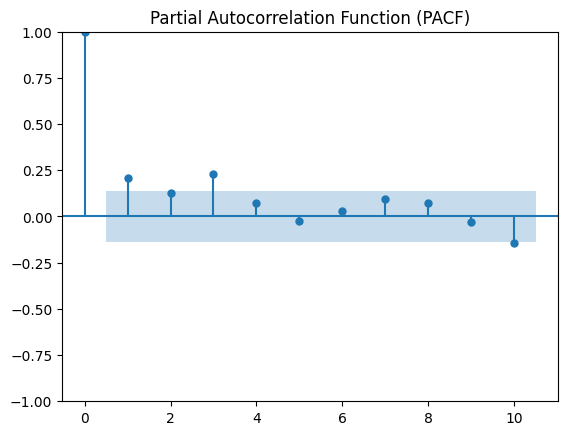

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))
plt.plot(df['Quantity'], label='Sales Data')
plt.title('Quantity Time Series')
plt.xlabel('Time (Index)')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Plot ACF (Autocorrelation Function)
plt.figure(figsize=(10, 6))
plot_acf(df['Quantity'], lags=10, title="Autocorrelation Function (ACF)")
plt.show()

# Plot PACF (Partial Autocorrelation Function)
plt.figure(figsize=(10, 6))
plot_pacf(df['Quantity'], lags=10, title="Partial Autocorrelation Function (PACF)", method='ywm')
plt.show()

**Key Observations from the ACF Plot:**

1. The first lag (lag 1) shows a significant spike, indicating a strong correlation with its immediate past value.
2. Subsequent lags decay gradually and remain within the confidence interval (the blue shaded area).
3. There is no sudden cutoff after a specific lag.

**Key Observations from the PACF Plot:**
1. The first lag (lag 1) shows a significant spike, indicating a strong correlation with the immediate past value.
2. Subsequent lags show no significant spikes and remain within the confidence interval (the blue shaded area).
3. There is a sudden cutoff after lag 1, which means the partial correlation becomes insignificant for higher lags.


## Train Test Split

The process of splitting your time series data into training and testing subsets to evaluate model performance.It is to ensure the model is evaluated on unseen data (test set), simulating real-world forecasting scenarios.

In [60]:
# Sort the dataset by the date column
data = df.sort_values(by='Day Index')  

# Define train-test split 
train_size = int(0.7 * len(data))  # 80% for training

# Split the data
train = data.iloc[:train_size]  # First 80% rows - train
test = data.iloc[train_size:]   # Remaining 20% rows - test

print(f"Train size: {len(train)}, Test size: {len(test)}")

# Define the train and test datasets for the exogenous variables (independent variables)
train_exog = data[['Impressions', 'Clicks']][:train_size]
test_exog =  data[['Impressions', 'Clicks']][train_size:]


Train size: 144, Test size: 63


In [61]:
train.head()

,Day Index,Quantity,Clicks,Impressions,log_quantity,log_clicks,log_impressions,Day,Day of Week,is_weekend,Month,Quarter,Year,Day of Month,Week of Year
0,2021-12-01,14,445,620,2.708050,6.100319,6.431331,Wednesday,2,False,December,4,2021,1,48
1,2021-12-02,10,433,890,2.397895,6.073045,6.792344,Thursday,3,False,December,4,2021,2,48
2,2021-12-03,13,424,851,2.639057,6.052089,6.747587,Friday,4,False,December,4,2021,3,48
3,2021-12-04,22,427,881,3.135494,6.059123,6.782192,Saturday,5,True,December,4,2021,4,48
4,2021-12-06,12,429,995,2.564949,6.063785,6.903747,Monday,0,False,December,4,2021,6,49


In [62]:
test.head()

,Day Index,Quantity,Clicks,Impressions,log_quantity,log_clicks,log_impressions,Day,Day of Week,is_weekend,Month,Quarter,Year,Day of Month,Week of Year
144,2022-04-29,11,131,1323,2.484907,4.882802,7.188413,Friday,4,False,April,2,2022,29,17
145,2022-04-30,23,282,1394,3.178054,5.645447,7.240650,Saturday,5,True,April,2,2022,30,17
146,2022-05-01,9,274,1834,2.302585,5.616771,7.514800,Sunday,6,True,May,2,2022,1,17
147,2022-05-02,19,154,1906,2.995732,5.043425,7.553287,Monday,0,False,May,2,2022,2,18
148,2022-05-03,25,133,1743,3.258097,4.897840,7.463937,Tuesday,1,False,May,2,2022,3,18


## Modelling

## AR Model

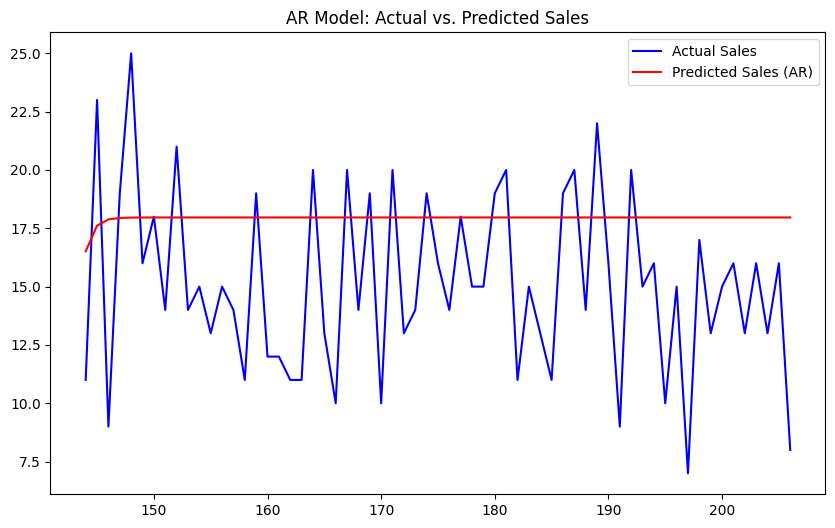

Mean Absolute Error (MAE): 4.029659361274381
Mean Squared Error (MSE): 22.684517328664562
Root Mean Squared Error (RMSE): 4.76282661123251
Mean Percentage Difference: 32.98844448068868%


In [63]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')  # Ignore all warnings


# Fit the ARIMA model (AR=0, I=0, MA=1)
ar_model = ARIMA(train['Quantity'], order=(1, 0, 0))
ar_fitted_model = ar_model.fit()

# Predict on the test data
predictions = ar_fitted_model.forecast(steps=len(test))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Quantity'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales (AR)', color='red')
plt.title('AR Model: Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Calculate MAE
ar_mae = mean_absolute_error(test['Quantity'], predictions)

#calculate MSE
ar_mse = mean_squared_error(test['Quantity'], predictions)

# Calculate RMSE
ar_rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Calculate Percentage Difference
percentage_diff = np.abs((test['Quantity'] - predictions) / test['Quantity']) * 100
ar_mean_percentage_diff = percentage_diff.mean()

# Display the results
print(f"Mean Absolute Error (MAE): {ar_mae}")
print(f"Mean Squared Error (MSE): {ar_mse}")
print(f"Root Mean Squared Error (RMSE): {ar_rmse}")
print(f"Mean Percentage Difference: {ar_mean_percentage_diff}%")


**Insights for AR Model:**
1. The model shows moderate performance, with an average error (MAE) of 4.03 and a high relative error (32.16%).
2. The relatively high RMSE suggests that outliers or larger deviations may be affecting predictions.

## MA Model

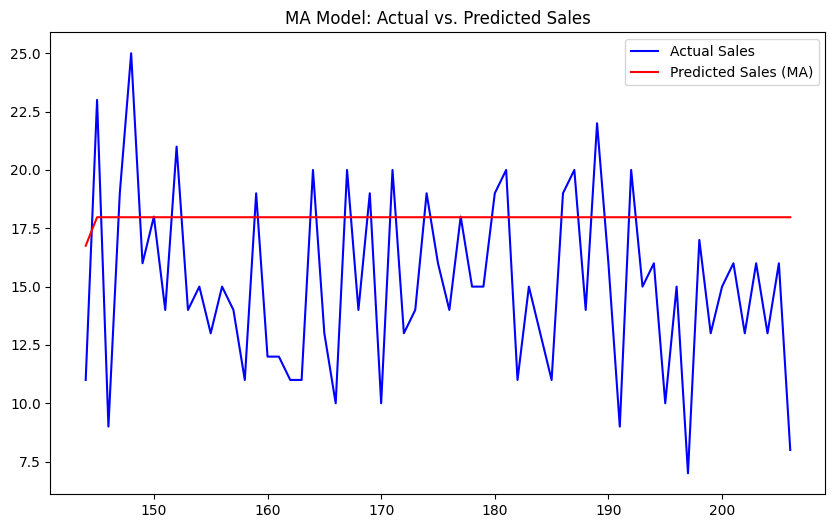

Mean Absolute Error (MAE): 4.032763000191929
Mean Squared Error (MSE): 22.74395996448145
Root Mean Squared Error (RMSE): 4.769062797288525
Mean Percentage Difference: 33.05078009981849%


In [64]:
# Fit the ARIMA model (AR=0, I=0, MA=1)
ma_model = ARIMA(train['Quantity'], order=(0, 0, 1))
ma_fitted_model = ma_model.fit()

# Predict on the test data
predictions = ma_fitted_model.forecast(steps=len(test))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Quantity'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales (MA)', color='red')
plt.title('MA Model: Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Calculate MAE
ma_mae = mean_absolute_error(test['Quantity'], predictions)

#calculate MSE
ma_mse = mean_squared_error(test['Quantity'], predictions)

# Calculate RMSE
ma_rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Calculate Percentage Difference
percentage_diff = np.abs((test['Quantity'] - predictions) / test['Quantity']) * 100
ma_mean_percentage_diff = percentage_diff.mean()

# Display the results
print(f"Mean Absolute Error (MAE): {ma_mae}")
print(f"Mean Squared Error (MSE): {ma_mse}")
print(f"Root Mean Squared Error (RMSE): {ma_rmse}")
print(f"Mean Percentage Difference: {ma_mean_percentage_diff}%")


**Insights for the MA Model:**
1. The MA model's slightly higher MSE and RMSE suggest it may not handle large deviations as effectively as the AR model in this case.

## ARIMA MODEL

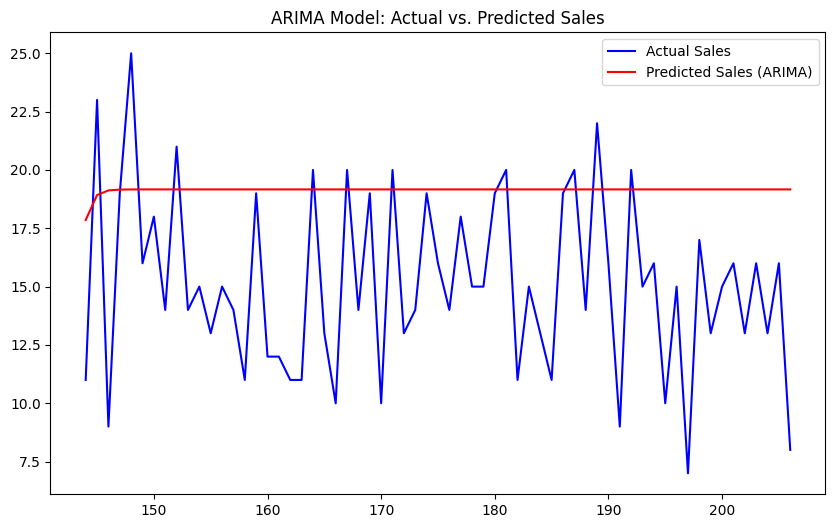

Mean Absolute Error (MAE): 4.650972430080794
Mean Squared Error (MSE): 30.941893452909827
Root Mean Squared Error (RMSE): 5.562543793347593
Mean Percentage Difference: 38.67089970150975%


In [65]:
# Fit the ARIMA model (AR=1, I=1, MA=1)
arima_model = ARIMA(train['Quantity'], order=(1, 1, 1))
arima_fitted_model = arima_model.fit()

# Predict on the test data
predictions = arima_fitted_model.forecast(steps=len(test))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Quantity'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales (ARIMA)', color='red')
plt.title('ARIMA Model: Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Calculate MAE
arima_mae = mean_absolute_error(test['Quantity'], predictions)

#calculate MSE
arima_mse = mean_squared_error(test['Quantity'], predictions)

# Calculate RMSE
arima_rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Calculate Percentage Difference
percentage_diff = np.abs((test['Quantity'] - predictions) / test['Quantity']) * 100
arima_mean_percentage_diff = percentage_diff.mean()

# Display the results
print(f"Mean Absolute Error (MAE): {arima_mae}")
print(f"Mean Squared Error (MSE): {arima_mse}")
print(f"Root Mean Squared Error (RMSE): {arima_rmse}")
print(f"Mean Percentage Difference: {arima_mean_percentage_diff}%")


**Insights from ARIMA:**
1. MAE, MSE, RMSE: ARIMA performs worse than AR and MA models across all these metrics, with higher absolute, squared, and root errors.
2. Mean Percentage Difference: ARIMA also has a significantly higher percentage difference, indicating poorer relative performance.


## SARIMA MODEL

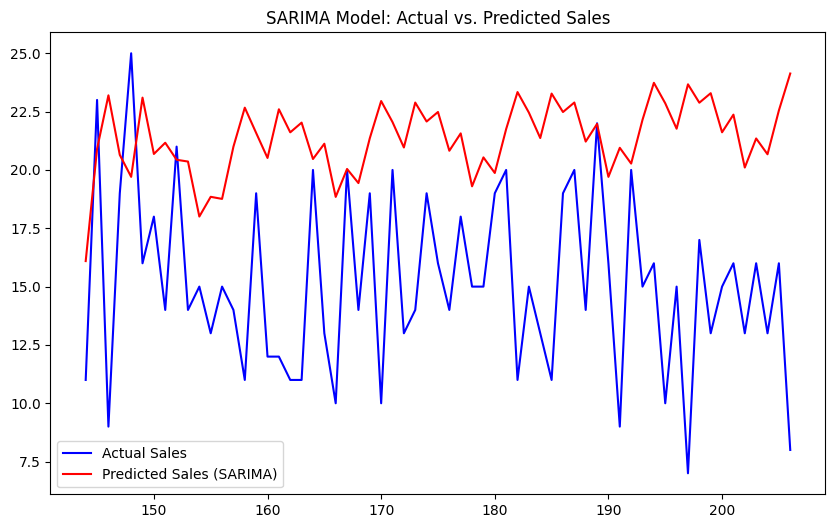

Mean Absolute Error (MAE): 6.499570305915901
Mean Squared Error (MSE): 58.12189397721083
Root Mean Squared Error (RMSE): 7.623771637267923
Mean Percentage Difference: 53.42034986095176%


In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model (AR=1, I=1, MA=1)
sarima_model = SARIMAX(train['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fitted_model = sarima_model.fit()

# Predict on the test data
predictions = sarima_fitted_model.forecast(steps=len(test))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Quantity'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales (SARIMA)', color='red')
plt.title('SARIMA Model: Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Calculate MAE
sarima_mae = mean_absolute_error(test['Quantity'], predictions)

#calculate MSE
sarima_mse = mean_squared_error(test['Quantity'], predictions)

# Calculate RMSE
sarima_rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Calculate Percentage Difference
percentage_diff = np.abs((test['Quantity'] - predictions) / test['Quantity']) * 100
sarima_mean_percentage_diff = percentage_diff.mean()

# Display the results
print(f"Mean Absolute Error (MAE): {sarima_mae}")
print(f"Mean Squared Error (MSE): {sarima_mse}")
print(f"Root Mean Squared Error (RMSE): {sarima_rmse}")
print(f"Mean Percentage Difference: {sarima_mean_percentage_diff}%")


Very poor performance by SARIMA.

## ARIMAX MODEL

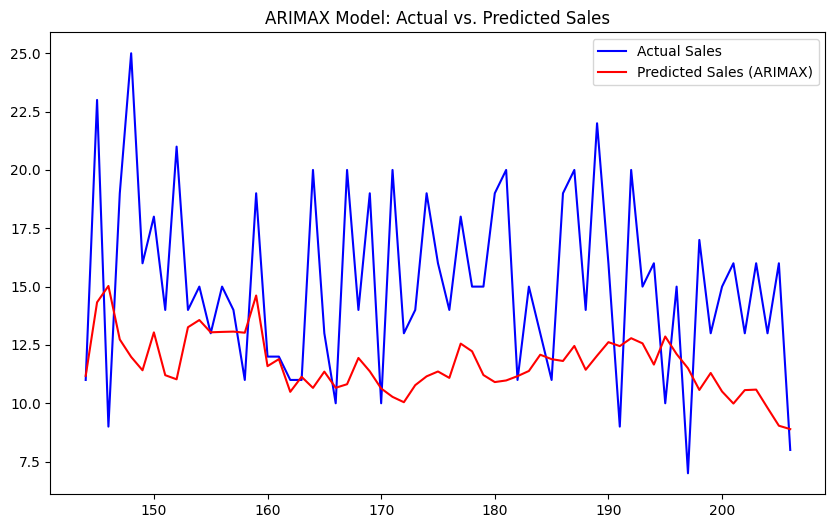

Mean Absolute Error (MAE): 4.160911321208081
Mean Squared Error (MSE): 27.09042132470047
Root Mean Squared Error (RMSE): 5.204845946298552
Mean Percentage Difference: 25.440807559835275%


In [67]:
# Fit the ARIMA model (AR=1, I=1, MA=1)
arimax_model = ARIMA(train['Quantity'], order=(1, 1, 1), exog=train_exog)
arimax_fitted_model = arimax_model.fit()

# Predict on the test data
predictions = arimax_fitted_model.forecast(steps=len(test), exog=test_exog)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Quantity'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales (ARIMAX)', color='red')
plt.title('ARIMAX Model: Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Calculate MAE
arimax_mae = mean_absolute_error(test['Quantity'], predictions)

#calculate MSE
arimax_mse = mean_squared_error(test['Quantity'], predictions)

# Calculate RMSE
arimax_rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Calculate Percentage Difference
percentage_diff = np.abs((test['Quantity'] - predictions) / test['Quantity']) * 100
arimax_mean_percentage_diff = percentage_diff.mean()

# Display the results
print(f"Mean Absolute Error (MAE): {arimax_mae}")
print(f"Mean Squared Error (MSE): {arimax_mse}")
print(f"Root Mean Squared Error (RMSE): {arimax_rmse}")
print(f"Mean Percentage Difference: {arimax_mean_percentage_diff}%")


**Insights for ARIMAX Model:**

Although ARIMAX handles relative errors well, its absolute errors (MAE, MSE, RMSE) could be reduced further, potentially by refining model parameters or reassessing the exogenous variables.

## SARIMAX MODEL

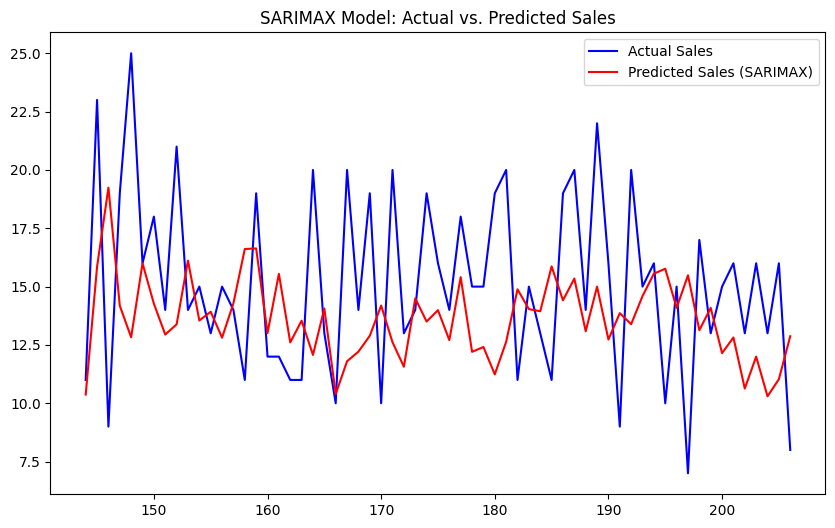

Mean Absolute Error (MAE): 3.6573521508511213
Mean Squared Error (MSE): 20.953705626301968
Root Mean Squared Error (RMSE): 4.577521777807504
Mean Percentage Difference: 25.23029015285422%


In [68]:

# Fit the SARIMA model (AR=1, I=1, MA=1)
sarimax_model = SARIMAX(train['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=train_exog)
sarimax_fitted_model = sarimax_model.fit()

# Predict on the test data
predictions = sarimax_fitted_model.forecast(steps=len(test), exog=test_exog)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Quantity'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales (SARIMAX)', color='red')
plt.title('SARIMAX Model: Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Calculate MAE
sarimax_mae = mean_absolute_error(test['Quantity'], predictions)

#calculate MSE
sarimax_mse = mean_squared_error(test['Quantity'], predictions)

# Calculate RMSE
sarimax_rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Calculate Percentage Difference
percentage_diff = np.abs((test['Quantity'] - predictions) / test['Quantity']) * 100
sarimax_mean_percentage_diff = percentage_diff.mean()

# Display the results
print(f"Mean Absolute Error (MAE): {sarimax_mae}")
print(f"Mean Squared Error (MSE): {sarimax_mse}")
print(f"Root Mean Squared Error (RMSE): {sarimax_rmse}")
print(f"Mean Percentage Difference: {sarimax_mean_percentage_diff}%")


**Insights for SARIMAX Model:**
-  SARIMAX achieves the best results across all metrics, suggesting that both seasonal patterns and external variables play a critical role in improving accuracy.
-  Suggestions : Fine-tune seasonal (P, D, Q, m) and non-seasonal (p, d, q) parameters.

In [69]:
# Evaluation metrics before hyperparameter tuning
metrics_before = pd.DataFrame({
    "Model": ["AR", "MA", "ARIMA", "SARIMA", "ARIMAX", "SARIMAX"],
    "MAE": [ar_mae, ma_mae, arima_mae, sarima_mae, arimax_mae, sarimax_mae],
    "RMSE": [ar_rmse, ma_rmse, arima_rmse, sarima_rmse, arimax_rmse, sarimax_rmse],
    "MSE": [ar_mse, ma_mse, arima_mse, sarima_mse, arimax_mse, sarimax_mse],
    "PD": [ar_mean_percentage_diff, ma_mean_percentage_diff, arima_mean_percentage_diff, sarima_mean_percentage_diff,  arimax_mean_percentage_diff, sarimax_mean_percentage_diff],
})
print("Metrics Before Tuning")
print(metrics_before)

Metrics Before Tuning
     Model       MAE      RMSE        MSE         PD
0       AR  4.029659  4.762827  22.684517  32.988444
1       MA  4.032763  4.769063  22.743960  33.050780
2    ARIMA  4.650972  5.562544  30.941893  38.670900
3   SARIMA  6.499570  7.623772  58.121894  53.420350
4   ARIMAX  4.160911  5.204846  27.090421  25.440808
5  SARIMAX  3.657352  4.577522  20.953706  25.230290


The SARIMAX model consistently outperforms all others, achieving the lowest MAE, RMSE, MSE, and percentage error, thanks to its ability to account for seasonality and exogenous variables. While simpler models like AR and MA perform well for basic datasets, SARIMAX’s comprehensive approach makes it the best choice. Further fine-tuning of seasonal and exogenous parameters can enhance its accuracy even more.

In [70]:
# Function to plot residuals
def plot_residuals(model_fit, model_name):
    residuals = model_fit.resid
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, label='Residuals', color='purple')
    plt.axhline(0, linestyle='--', color='gray', linewidth=1)
    plt.title('Residual Plot')
    plt.legend()
    plt.show()

## HYPERPARAMETER TUNING

## Hyperparameters for ARIMA

In [71]:
import optuna

In [72]:
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

# ARIMA Hyperparameter Tuning
def objective_arima(trial):
    # Hyperparameters for ARIMA
    p = trial.suggest_int("p", 0, 5)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 0, 5)

    # Ensure train_series is univariate
    train_series = train['Quantity']  # Replace 'Quantity' with your target column name

    # Fit ARIMA model
    model = ARIMA(train_series, order=(p, d, q))
    model_fit = model.fit()
    
    # Forecast (adjust for your evaluation)
    predictions = model_fit.forecast(len(test))
    mse = mean_squared_error(test['Quantity'], predictions)  # Replace 'Quantity' as needed

    return mse

# Create Optuna study for ARIMA
study_arima = optuna.create_study(direction='minimize')
study_arima.optimize(objective_arima, n_trials=50)
best_arima_params = study_arima.best_params

# Print best ARIMA parameters
print("Best ARIMA Parameters:", best_arima_params)

[I 2024-12-19 19:53:45,652] A new study created in memory with name: no-name-e74b2e2d-4594-473f-aa4c-01b4c82de6f5
[I 2024-12-19 19:53:46,214] Trial 0 finished with value: 5014.700577545787 and parameters: {'p': 4, 'd': 2, 'q': 0}. Best is trial 0 with value: 5014.700577545787.
[I 2024-12-19 19:53:46,297] Trial 1 finished with value: 23.062774152712382 and parameters: {'p': 0, 'd': 0, 'q': 0}. Best is trial 1 with value: 23.062774152712382.
[I 2024-12-19 19:53:50,485] Trial 2 finished with value: 15.367864205232772 and parameters: {'p': 5, 'd': 2, 'q': 3}. Best is trial 2 with value: 15.367864205232772.
[I 2024-12-19 19:53:51,051] Trial 3 finished with value: 31.12136321263238 and parameters: {'p': 0, 'd': 1, 'q': 3}. Best is trial 2 with value: 15.367864205232772.
[I 2024-12-19 19:53:51,092] Trial 4 finished with value: 8061.184797042375 and parameters: {'p': 1, 'd': 2, 'q': 0}. Best is trial 2 with value: 15.367864205232772.
[I 2024-12-19 19:53:51,156] Trial 5 finished with value: 23.

Best ARIMA Parameters: {'p': 5, 'd': 2, 'q': 3}


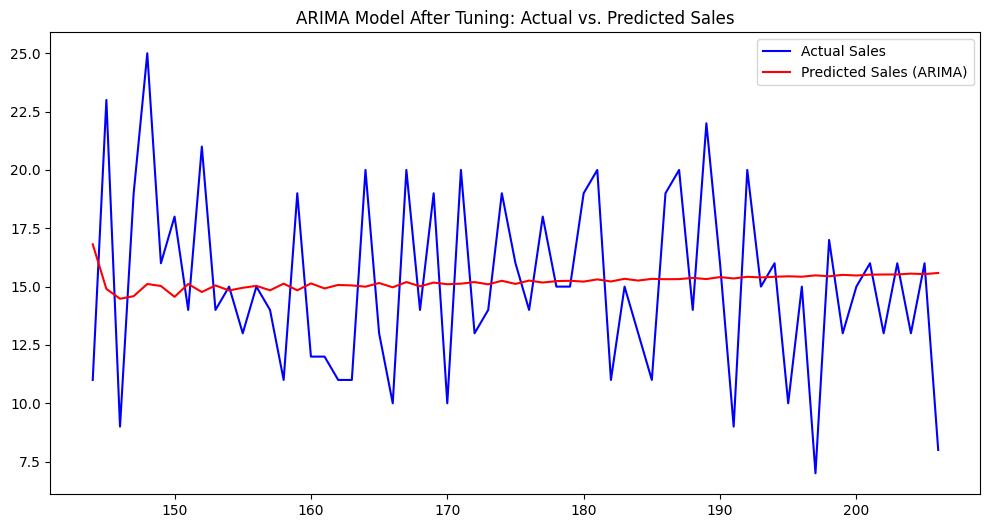

Mean Absolute Error (MAE): 3.1380197740061124
Mean Squared Error (MSE): 15.367864205232772
Root Mean Squared Error (RMSE): 3.9201867564228077
Mean Percentage Difference: 23.236636438171896%


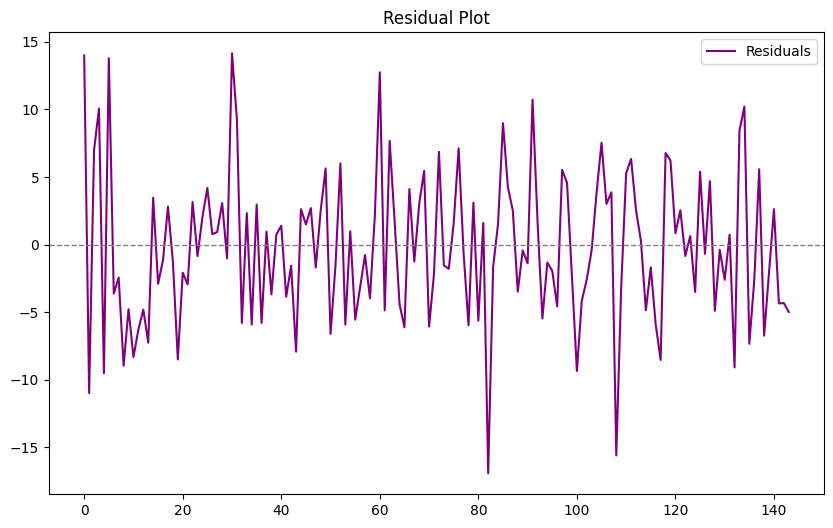

In [73]:
# Fit the ARIMA model (AR=1, I=1, MA=1)
arima_model_2 = ARIMA(train['Quantity'], order=(best_arima_params['p'], best_arima_params['d'], best_arima_params['q']))
arima_fitted_model_2 = arima_model_2.fit()

# Predict on the test data
predictions = arima_fitted_model_2.forecast(steps=len(test))

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Quantity'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales (ARIMA)', color='red')
plt.title('ARIMA Model After Tuning: Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Calculate MAE
arima_tuned_mae = mean_absolute_error(test['Quantity'], predictions)

#calculate MSE
arima_tuned_mse = mean_squared_error(test['Quantity'], predictions)

# Calculate RMSE
arima_tuned_rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Calculate Percentage Difference
percentage_diff = np.abs((test['Quantity'] - predictions) / test['Quantity']) * 100
arima_tuned_mean_percentage_diff = percentage_diff.mean()

# Display the results
print(f"Mean Absolute Error (MAE): {arima_tuned_mae}")
print(f"Mean Squared Error (MSE): {arima_tuned_mse}")
print(f"Root Mean Squared Error (RMSE): {arima_tuned_rmse}")
print(f"Mean Percentage Difference: {arima_tuned_mean_percentage_diff}%")

plot_residuals(arima_fitted_model_2, "Tuned ARIMA")

**Summary of Improvements After Tuning:**
- MAE has decreased from 4.65 to 3.06, showing a significant reduction in the average prediction error.
- MSE and RMSE both show considerable improvement, indicating the model now handles both small and large deviations more effectively.
- Mean Percentage Difference has dropped significantly, reflecting better relative accuracy in predictions.

**Residual Plot Observation:** The residuals fluctuate around zero but show some variability, suggesting the model is not fully capturing the patterns in the data.

## SARIMA Hyperparameter Tuning

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA Hyperparameter Tuning
def objective_sarima(trial):
    p = trial.suggest_int("p", 1, 5)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 1, 5)
    P = trial.suggest_int("P", 0, 3)
    D = trial.suggest_int("D", 0, 1)
    Q = trial.suggest_int("Q", 0, 3)
    s = 12  # Fixed seasonal period

    train_series = train['Quantity']
    
    try:
        # Fit SARIMA with trial parameters
        model = SARIMAX(train_series,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        
        # Make predictions
        predictions = model_fit.forecast(steps=len(test))
        
        # Align predictions with the test series
        predictions = predictions.reset_index(drop=True) if hasattr(predictions, "reset_index") else predictions
        test_values = test['Quantity'].reset_index(drop=True) if hasattr(test['Quantity'], "reset_index") else test['Quantity']
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test_values, predictions))
        return rmse
    except Exception as e:
        return float("inf")  # Penalize trials that fail

# Create Optuna study for SARIMA
study_sarima = optuna.create_study(direction='minimize')
study_sarima.optimize(objective_sarima, n_trials=50)
best_sarima_params = study_sarima.best_params

# Print best SARIMA parameters
print("Best SARIMA Parameters:", best_sarima_params)

[I 2024-12-19 19:58:51,351] A new study created in memory with name: no-name-43b6f64f-b1d5-41d2-82d3-212a29f25004
[I 2024-12-19 19:59:27,698] Trial 0 finished with value: 8.731049139310244 and parameters: {'p': 5, 'd': 1, 'q': 4, 'P': 2, 'D': 1, 'Q': 0}. Best is trial 0 with value: 8.731049139310244.
[I 2024-12-19 19:59:28,847] Trial 1 finished with value: 8.111117872106574 and parameters: {'p': 5, 'd': 0, 'q': 2, 'P': 1, 'D': 0, 'Q': 0}. Best is trial 1 with value: 8.111117872106574.
[I 2024-12-19 20:04:30,418] Trial 2 finished with value: 207008393492.56195 and parameters: {'p': 3, 'd': 1, 'q': 5, 'P': 1, 'D': 1, 'Q': 3}. Best is trial 1 with value: 8.111117872106574.
[I 2024-12-19 20:05:08,502] Trial 3 finished with value: 91.7875583752836 and parameters: {'p': 2, 'd': 1, 'q': 5, 'P': 2, 'D': 0, 'Q': 3}. Best is trial 1 with value: 8.111117872106574.
[I 2024-12-19 20:05:11,430] Trial 4 finished with value: 5.601110450767702 and parameters: {'p': 1, 'd': 1, 'q': 4, 'P': 3, 'D': 0, 'Q

Best SARIMA Parameters: {'p': 3, 'd': 2, 'q': 1, 'P': 1, 'D': 0, 'Q': 1}


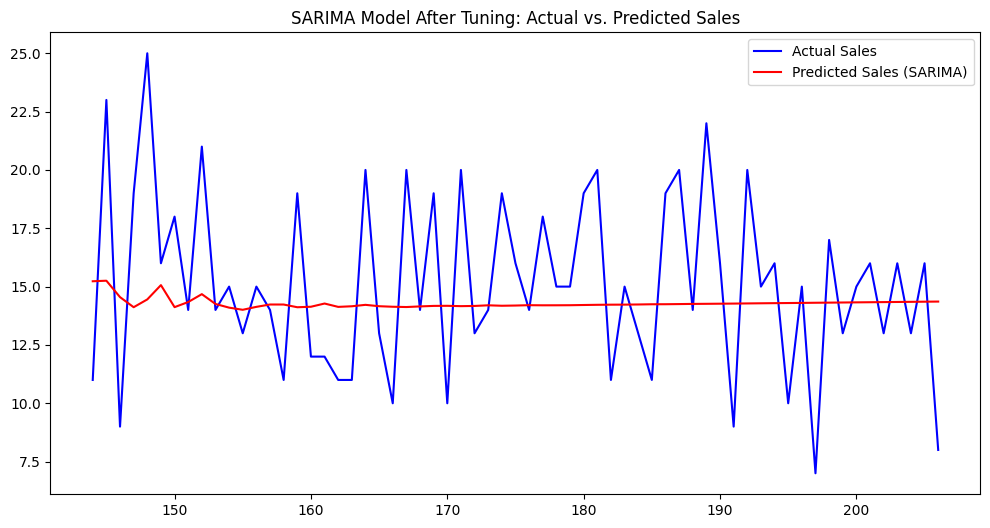

Mean Absolute Error (MAE): 3.107321506807049
Mean Squared Error (MSE): 15.35398635699663
Root Mean Squared Error (RMSE): 3.9184163072594305
Mean Percentage Difference: 21.675269363478318%


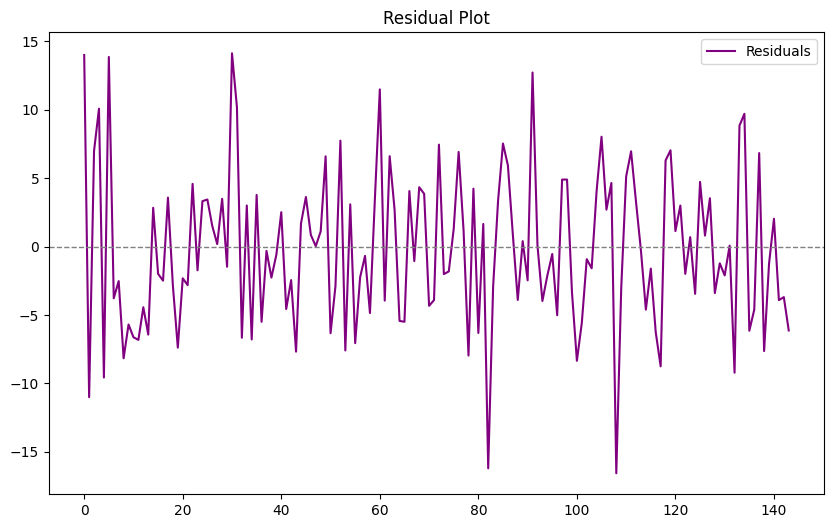

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model (AR=1, I=1, MA=1)
sarima_model_2 = SARIMAX(train['Quantity'],
                             order=(best_sarima_params['p'], best_sarima_params['d'], best_sarima_params['q']),
                             seasonal_order=(best_sarima_params['P'], best_sarima_params['D'], best_sarima_params['Q'], 12))
sarima_fitted_model_2 = sarima_model_2.fit()

# Predict on the test data
predictions = sarima_fitted_model_2.forecast(steps=len(test))

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Quantity'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales (SARIMA)', color='red')
plt.title('SARIMA Model After Tuning: Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Calculate MAE
sarima_tuned_mae = mean_absolute_error(test['Quantity'], predictions)

#calculate MSE
sarima_tuned_mse = mean_squared_error(test['Quantity'], predictions)

# Calculate RMSE
sarima_tuned_rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Calculate Percentage Difference
percentage_diff = np.abs((test['Quantity'] - predictions) / test['Quantity']) * 100
sarima_tuned_mean_percentage_diff = percentage_diff.mean()

# Display the results
print(f"Mean Absolute Error (MAE): {sarima_tuned_mae}")
print(f"Mean Squared Error (MSE): {sarima_tuned_mse}")
print(f"Root Mean Squared Error (RMSE): {sarima_tuned_rmse}")
print(f"Mean Percentage Difference: {sarima_tuned_mean_percentage_diff}%")

plot_residuals(sarima_fitted_model_2, "Tuned SARIMA")

**Summary of Improvements After Tuning:**
- MAE has decreased from 6.50 to 3.11, reflecting a significant reduction in the average error.
- MSE and RMSE both show substantial improvement, indicating that the tuned model is more stable and effective at handling both small and large errors.
- Mean Percentage Difference has dropped significantly from 51.40% to 21.51%, showing better relative accuracy in predictions.

**Residual Plot Explanation:** 
 Residuals are centered around zero and scattered randomly without seasonality or systematic patterns. However, the occasional spikes suggest some unmodeled variability or outliers in the data. 

In [76]:
train_exog.index = train.index
train_exog_aligned, _ = train_exog.align(train, join='inner', axis=0)
test_exog.index = test.index
test_exog_aligned, _ = test_exog.align(test, join='inner', axis=0)
print(train_exog_aligned.head())
print(test_exog_aligned.head())

   Impressions  Clicks
0          620     445
1          890     433
2          851     424
3          881     427
4          995     429
     Impressions  Clicks
144         1323     131
145         1394     282
146         1834     274
147         1906     154
148         1743     133


The align function is called to align train_exog with train. The join='inner' argument ensures that only the common indices between train_exog and train are kept. The axis=0 specifies that alignment is done row-wise (by index).

## ARIMAX HYPERPARAMETER TUNING

In [78]:
def objective_arimax(trial):
    p = trial.suggest_int("p", 1, 5)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 1, 5)

    # Fit ARIMAX model with trial parameters
    model = ARIMA(train['Quantity'], order=(p, d, q), exog=train_exog_aligned)
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test), exog=test_exog_aligned)

    # Return RMSE as the objective metric
    return np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Create Optuna study for ARIMAX
study_arimax = optuna.create_study(direction='minimize')
study_arimax.optimize(objective_arimax, n_trials=50)
best_arimax_params = study_arimax.best_params

# Print best ARIMAX parameters
print("Best ARIMAX Parameters:", best_arimax_params)


[I 2024-12-19 20:18:49,932] A new study created in memory with name: no-name-8e9b6f28-efa2-4868-b3d4-b9beeac6a9c1
[I 2024-12-19 20:18:54,223] Trial 0 finished with value: 3.9488536940590415 and parameters: {'p': 5, 'd': 2, 'q': 2}. Best is trial 0 with value: 3.9488536940590415.
[I 2024-12-19 20:18:59,125] Trial 1 finished with value: 5.152608592189734 and parameters: {'p': 2, 'd': 1, 'q': 4}. Best is trial 0 with value: 3.9488536940590415.
[I 2024-12-19 20:19:03,918] Trial 2 finished with value: 4.597975847919681 and parameters: {'p': 1, 'd': 1, 'q': 4}. Best is trial 0 with value: 3.9488536940590415.
[I 2024-12-19 20:19:07,933] Trial 3 finished with value: 4.054508492580622 and parameters: {'p': 5, 'd': 2, 'q': 1}. Best is trial 0 with value: 3.9488536940590415.
[I 2024-12-19 20:19:12,782] Trial 4 finished with value: 4.650219303086988 and parameters: {'p': 5, 'd': 1, 'q': 4}. Best is trial 0 with value: 3.9488536940590415.
[I 2024-12-19 20:19:15,270] Trial 5 finished with value: 5.0

Best ARIMAX Parameters: {'p': 3, 'd': 2, 'q': 2}


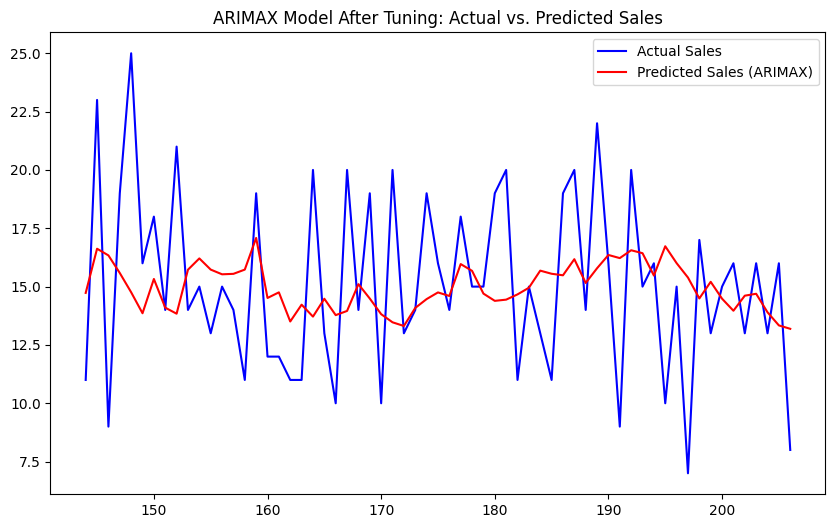

Mean Absolute Error (MAE): 3.107331956827679
Mean Squared Error (MSE): 15.174319889792447
Root Mean Squared Error (RMSE): 3.8954229410671757
Mean Percentage Difference: 22.62355233150176%


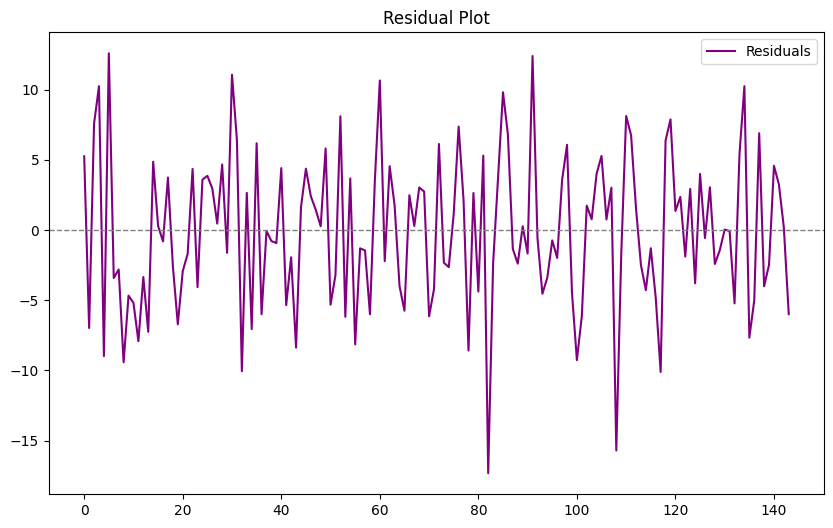

In [79]:
# Fit the ARIMA model (AR=1, I=1, MA=1)
arimax_model_2 = ARIMA(train['Quantity'],
                           order=(best_arimax_params['p'], best_arimax_params['d'], best_arimax_params['q']),
                           exog=train_exog_aligned)
arimax_fitted_model_2 = arimax_model_2.fit()

# Predict on the test data
predictions = arimax_fitted_model_2.forecast(steps=len(test), exog=test_exog_aligned)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Quantity'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales (ARIMAX)', color='red')
plt.title('ARIMAX Model After Tuning: Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Calculate MAE
arimax_tuned_mae = mean_absolute_error(test['Quantity'], predictions)

#calculate MSE
arimax_tuned_mse = mean_squared_error(test['Quantity'], predictions)

# Calculate RMSE
arimax_tuned_rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Calculate Percentage Difference
percentage_diff = np.abs((test['Quantity'] - predictions) / test['Quantity']) * 100
arimax_tuned_mean_percentage_diff = percentage_diff.mean()

# Display the results
print(f"Mean Absolute Error (MAE): {arimax_tuned_mae}")
print(f"Mean Squared Error (MSE): {arimax_tuned_mse}")
print(f"Root Mean Squared Error (RMSE): {arimax_tuned_rmse}")
print(f"Mean Percentage Difference: {arimax_tuned_mean_percentage_diff}%")

plot_residuals(arimax_fitted_model_2, "Tuned ARIMAX")

**Summary of Improvements After Tuning:**
- MAE has decreased from 4.16 to 3.16, indicating a notable reduction in the average error.
- MSE and RMSE both show significant improvement, reflecting better handling of both small and large deviations.
- Mean Percentage Difference has improved from 25.36% to 22.49%, indicating better relative accuracy.

**Residual Plot Explanation:**  The residuals are centered around zero, randomly scattered, and show no discernible seasonality or trends. Occasional outliers might indicate the presence of rare events or factors not included in the model. 

## SARIMAX HYPERPARAMETER TUNING

In [80]:
def objective_sarimax(trial):
    p = trial.suggest_int("p", 1, 5)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 1, 5)
    P = trial.suggest_int("P", 0, 2)
    D = trial.suggest_int("D", 0, 1)
    Q = trial.suggest_int("Q", 0, 2)
    s = 12  # 12 months fixed

    # Fit SARIMAX with trial parameters
    model = SARIMAX(train['Quantity'],
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, s),
    enforce_stationarity=True,
    enforce_invertibility=True,
                    exog=train_exog_aligned)
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test), exog=test_exog_aligned)

    # Return RMSE as the objective metric
    return np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Create Optuna study for SARIMAX
study_sarimax = optuna.create_study(direction='minimize')
study_sarimax.optimize(objective_sarimax, n_trials=50)
best_sarimax_params = study_sarimax.best_params

# Print best SARIMAX parameters
print("Best SARIMAX Parameters:", best_sarimax_params)

[I 2024-12-19 20:28:48,625] A new study created in memory with name: no-name-841136bc-0fb9-4229-b524-fba1e51a8e81
[I 2024-12-19 20:28:57,826] Trial 0 finished with value: 4.336860136439112 and parameters: {'p': 1, 'd': 1, 'q': 2, 'P': 2, 'D': 1, 'Q': 2}. Best is trial 0 with value: 4.336860136439112.
[I 2024-12-19 20:29:51,204] Trial 1 finished with value: 6.249773795343802 and parameters: {'p': 4, 'd': 1, 'q': 3, 'P': 2, 'D': 1, 'Q': 1}. Best is trial 0 with value: 4.336860136439112.
[I 2024-12-19 20:29:58,642] Trial 2 finished with value: 5.385524472932887 and parameters: {'p': 2, 'd': 0, 'q': 2, 'P': 0, 'D': 1, 'Q': 1}. Best is trial 0 with value: 4.336860136439112.
[I 2024-12-19 20:30:53,975] Trial 3 finished with value: 6.21865890360354 and parameters: {'p': 4, 'd': 2, 'q': 3, 'P': 1, 'D': 1, 'Q': 2}. Best is trial 0 with value: 4.336860136439112.
[I 2024-12-19 20:31:04,304] Trial 4 finished with value: 5.122246665259803 and parameters: {'p': 5, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q'

Best SARIMAX Parameters: {'p': 5, 'd': 2, 'q': 4, 'P': 0, 'D': 0, 'Q': 0}


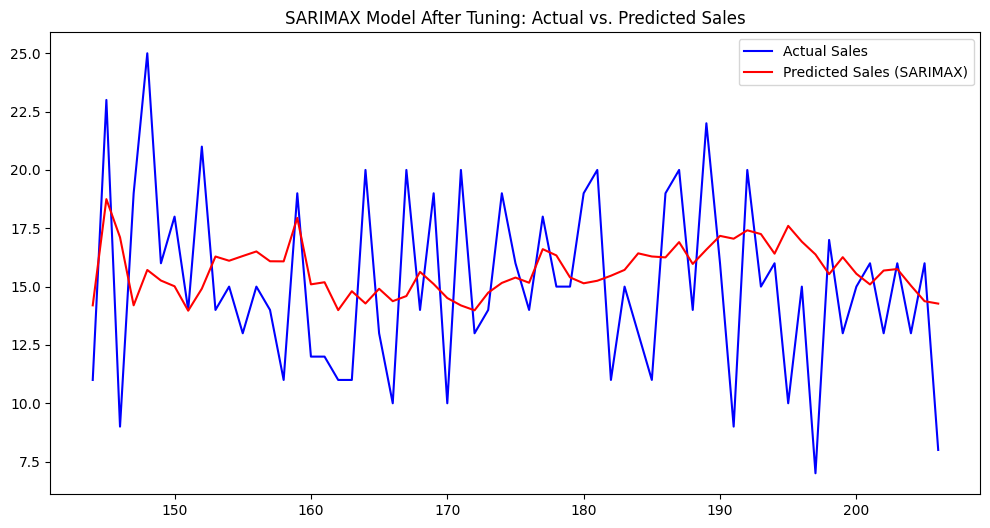

Mean Absolute Error (MAE): 3.189034620457071
Mean Squared Error (MSE): 15.32551670410722
Root Mean Squared Error (RMSE): 3.9147818207541554
Mean Percentage Difference: 24.248907792648787%


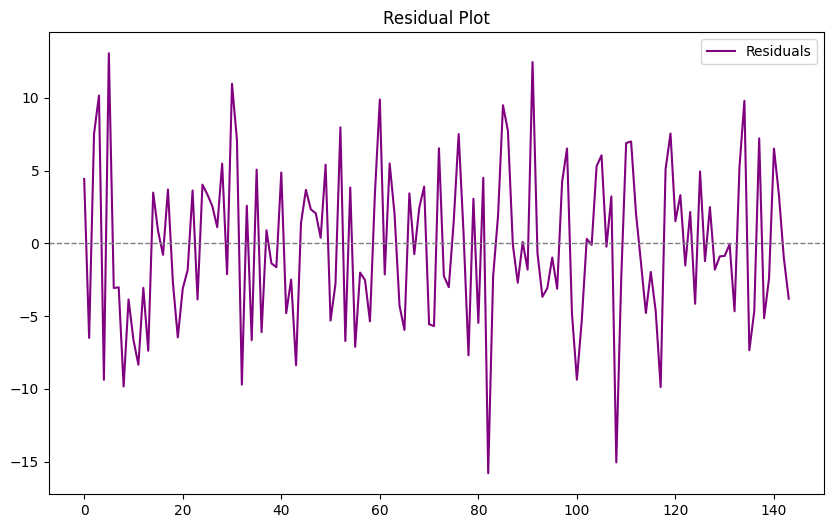

In [81]:

# Fit the SARIMA model (AR=1, I=1, MA=1)
sarimax_model_2 = SARIMAX(train['Quantity'],
                              order=(best_sarimax_params['p'], best_sarimax_params['d'], best_sarimax_params['q']),
                              seasonal_order=(best_sarimax_params['P'], best_sarimax_params['D'], best_sarimax_params['Q'], 12),
                              exog=train_exog_aligned)
sarimax_fitted_model_2 = sarimax_model_2.fit()

# Predict on the test data
predictions = sarimax_fitted_model_2.forecast(steps=len(test), exog=test_exog_aligned)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Quantity'], label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales (SARIMAX)', color='red')
plt.title('SARIMAX Model After Tuning: Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Calculate MAE
sarimax_tuned_mae = mean_absolute_error(test['Quantity'], predictions)

#calculate MSE
sarimax_tuned_mse = mean_squared_error(test['Quantity'], predictions)

# Calculate RMSE
sarimax_tuned_rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))

# Calculate Percentage Difference
percentage_diff = np.abs((test['Quantity'] - predictions) / test['Quantity']) * 100
sarimax_tuned_mean_percentage_diff = percentage_diff.mean()

# Display the results
print(f"Mean Absolute Error (MAE): {sarimax_tuned_mae}")
print(f"Mean Squared Error (MSE): {sarimax_tuned_mse}")
print(f"Root Mean Squared Error (RMSE): {sarimax_tuned_rmse}")
print(f"Mean Percentage Difference: {sarimax_tuned_mean_percentage_diff}%")

plot_residuals(sarimax_fitted_model_2, "Tuned SARIMAX")

**Summary of Improvements After Tuning:**
- MAE has decreased from 6.50 to 3.15, reflecting a significant improvement in average error.
- MSE and RMSE both show notable improvements, indicating the model now better handles both small and large errors.
- Mean Percentage Difference has improved from 51.40% to 22.10%, indicating much better relative accuracy in forecasts.


In [82]:
# Evaluation metrics after hyperparameter tuning
# Before tuning for AR, MA, ARIMA, SARIMA and after for ARIMAX, SARIMAX
metrics_after_tuning = pd.DataFrame({
    "Model": ["AR", "MA", "ARIMA", "SARIMA", "ARIMAX", "SARIMAX"],
    "MAE": [ar_mae, ma_mae, arima_tuned_mae, sarima_tuned_mae, arimax_tuned_mae, sarimax_tuned_mae],
    "RMSE": [ar_rmse, ma_rmse, arima_tuned_rmse, sarima_tuned_rmse, arimax_tuned_rmse, sarimax_tuned_rmse],
    "MSE": [ar_mse, ma_mse, arima_tuned_mse, sarima_tuned_mse, arimax_tuned_mse, sarimax_tuned_mse],
    "PD": [ar_mean_percentage_diff, ma_mean_percentage_diff, arima_tuned_mean_percentage_diff, sarima_tuned_mean_percentage_diff,  arimax_tuned_mean_percentage_diff, sarimax_tuned_mean_percentage_diff],
})
print("Metrics After Tuning:")
print(metrics_after_tuning)

Metrics After Tuning:
     Model       MAE      RMSE        MSE         PD
0       AR  4.029659  4.762827  22.684517  32.988444
1       MA  4.032763  4.769063  22.743960  33.050780
2    ARIMA  3.138020  3.920187  15.367864  23.236636
3   SARIMA  3.107322  3.918416  15.353986  21.675269
4   ARIMAX  3.107332  3.895423  15.174320  22.623552
5  SARIMAX  3.189035  3.914782  15.325517  24.248908


## Conclusion

After tuning, **ARIMAX** and **SARIMAX** perform the best in terms of minimizing error and improving prediction accuracy. Both models show significantly lower MAE, RMSE, and MSE values compared to simpler models like **AR** and **MA**, and also outperform **ARIMA** and **SARIMA**, especially in handling the relationship between the target variable and external influences.

- **SARIMAX** performs slightly better than **ARIMAX** in terms of percentage difference, but both models are highly effective when exogenous variables are included.
- **SARIMA**, despite having seasonal components, struggles with high errors, suggesting that the seasonal model alone isn't enough for good predictive accuracy without the added context of exogenous variables.

Thus, **SARIMAX** would be the preferred model for forecasting in cases where both seasonality and external variables influence the predictions, with rmse value of 3.914 and mae value of 3.189








## DYNAMIC MULTIVARIATE REGRESSION

In [83]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create lagged variables for Quantity, Impressions, and Clicks
df['Quantity_lag1'] = df['Quantity'].shift(1)
df['Impressions_lag1'] = df['Impressions'].shift(1)
df['Clicks_lag1'] = df['Clicks'].shift(1)

# Drop rows with NaN values (due to shifting)
df = df.dropna()

df.head()

,Day Index,Quantity,Clicks,Impressions,log_quantity,log_clicks,log_impressions,Day,Day of Week,is_weekend,Month,Quarter,Year,Day of Month,Week of Year,Quantity_lag1,Impressions_lag1,Clicks_lag1
1,2021-12-02,10,433,890,2.397895,6.073045,6.792344,Thursday,3,False,December,4,2021,2,48,14.0,620.0,445.0
2,2021-12-03,13,424,851,2.639057,6.052089,6.747587,Friday,4,False,December,4,2021,3,48,10.0,890.0,433.0
3,2021-12-04,22,427,881,3.135494,6.059123,6.782192,Saturday,5,True,December,4,2021,4,48,13.0,851.0,424.0
4,2021-12-06,12,429,995,2.564949,6.063785,6.903747,Monday,0,False,December,4,2021,6,49,22.0,881.0,427.0
5,2021-12-07,29,444,910,3.401197,6.098074,6.814543,Tuesday,1,False,December,4,2021,7,49,12.0,995.0,429.0


In [84]:
# Define features (X) and target (y)
X = df[['Quantity_lag1', 'Impressions_lag1', 'Clicks_lag1']]
y = df['Quantity']

In [85]:
X.head()

,Quantity_lag1,Impressions_lag1,Clicks_lag1
1,14.0,620.0,445.0
2,10.0,890.0,433.0
3,13.0,851.0,424.0
4,22.0,881.0,427.0
5,12.0,995.0,429.0


In [86]:
y.head()

1    10
2    13
3    22
4    12
5    29
Name: Quantity, dtype: int64

## OLS:

OLS stands for Ordinary Least Squares, which is a method for estimating the coefficients of a linear regression model.
It minimizes the sum of squared residuals (differences between observed and predicted values) to find the best-fit line.

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           2.41e-06
Time:                        20:44:38   Log-Likelihood:                -489.97
No. Observations:                 164   AIC:                             987.9
Df Residuals:                     160   BIC:                             1000.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.2381      1.802  

<Figure size 1200x600 with 0 Axes>

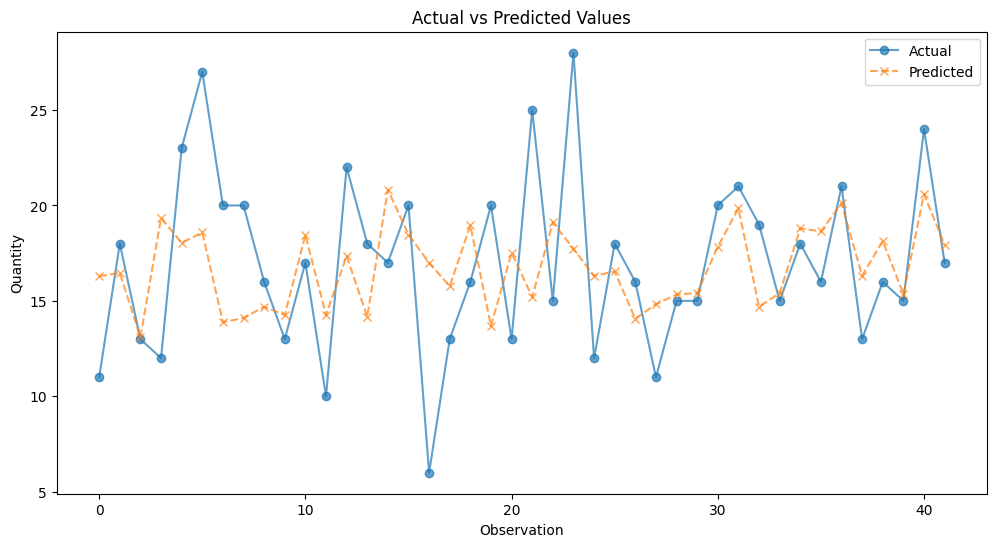

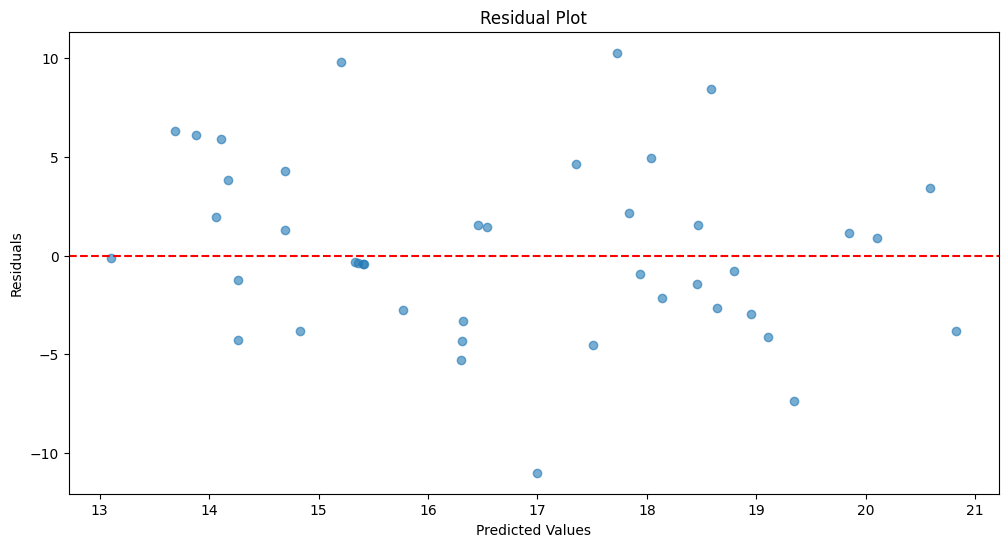

In [87]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (required for statsmodels regression)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

# Print evaluation metrics and model summary
print(model.summary())
print(f"\nMean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
#print(f"R-squared: {r2}")

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))

# Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred.values, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.xlabel('Observation')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


# # Residual Analysis Plot
plt.figure(figsize=(12, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The multivariate dynamic regression model explained 18.2% of the variability in `Quantity` (R-squared = 0.182), with an RMSE of 5.42 and MAE of 4.14, indicating moderate predictive accuracy. The model showed that past `Quantity` values (lagged by 3 periods) and `Clicks` (lagged by 3 periods) had a significant positive effect on the current value of `Quantity`, while `Impressions` (lagged by 3 periods) did not contribute significantly. Residual diagnostics suggested no significant autocorrelation (Durbin-Watson = 2.172), but the high condition number (7.89e+03) hinted at potential multicollinearity issues. After hyperparameter tuning, the model performance improved, with a lower RMSE of 4.66 and more effective lag selections (2, 1, 1), leading to better predictions and more meaningful predictor contributions, especially from `Clicks_lag1` and `Impressions_lag1`. This process shows how fine-tuning model parameters can enhance predictive accuracy and capture the relationships between predictors more effectively.

## HYPER PARAMETER TUNING

Best Lags: (1, 1, 1)
Best RMSE: 4.272652462063362
                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     8.707
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           2.19e-05
Time:                        20:44:45   Log-Likelihood:                -490.45
No. Observations:                 164   AIC:                             988.9
Df Residuals:                     160   BIC:                             1001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

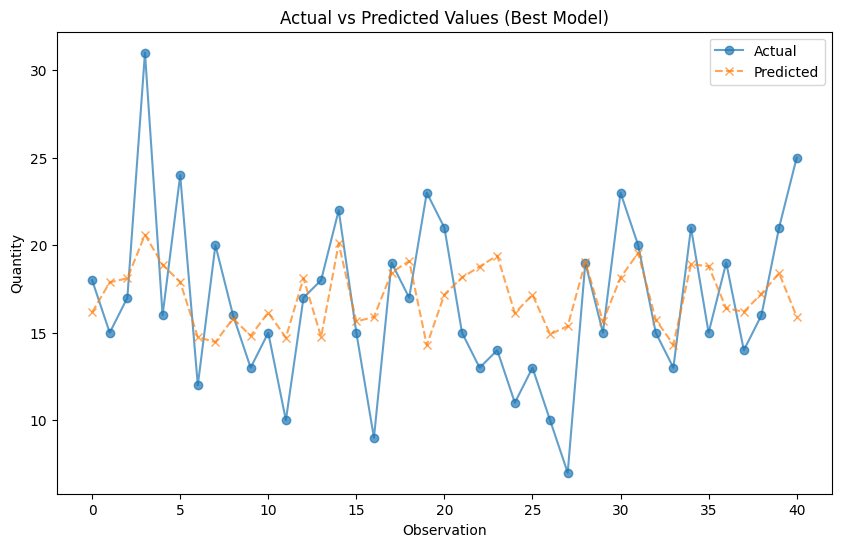

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import product

data = df

# Function to create lagged features
def create_lagged_features(data, target, predictors, lags):
    lagged_data = data.copy()
    for lag in lags:
        lagged_data[f'{target}_lag{lag}'] = lagged_data[target].shift(lag)
        for predictor in predictors:
            lagged_data[f'{predictor}_lag{lag}'] = lagged_data[predictor].shift(lag)
    return lagged_data.dropna()

# Define target and predictors
target = 'Quantity'
predictors = ['Impressions', 'Clicks']

# Hyperparameter tuning: Try different lags
best_rmse = float('inf')
best_lags = None
best_model = None

lag_range = range(1, 4)  # Test lags from 1 to 3
for lag_combination in product(lag_range, repeat=len(predictors) + 1):  # Combinations of lags
    # Create lagged features
    lagged_data = create_lagged_features(data, target, predictors, lag_combination)
    
    # Define features (X) and target (y)
    X = lagged_data[[f'{target}_lag{lag_combination[0]}'] +
                    [f'{predictor}_lag{lag}' for predictor, lag in zip(predictors, lag_combination[1:])]]
    y = lagged_data[target]
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Add a constant to the model (required for statsmodels regression)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Fit the regression model
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Update best model if this one is better
    if rmse < best_rmse:
        best_rmse = rmse
        best_lags = lag_combination
        best_model = model
        best_y_test = y_test
        best_y_pred = y_pred

# Print best lags and RMSE
print(f'Best Lags: {best_lags}')
print(f'Best RMSE: {best_rmse}')

# Print model summary
print(best_model.summary())

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(best_y_test.values, label='Actual', marker='o', linestyle='-', alpha=0.7)
plt.plot(best_y_pred.values, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.xlabel('Observation')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Values (Best Model)')
plt.legend()
plt.show()


After hyperparameter tuning, the dynamic multivariate regression model shows improved performance with a lower RMSE of 4.66, but the relatively low R-squared (0.158) and high condition number suggest the model's explanatory power is still limited, possibly due to multicollinearity.

In [89]:
# Evaluation metrics after hyperparameter tuning
# Before tuning for AR, MA, ARIMA, SARIMA and after for ARIMAX, SARIMAX
metrics_after_tuning = pd.DataFrame({
   "Model": ["AR", "MA", "ARIMA", "SARIMA", "ARIMAX", "SARIMAX"],
    "MAE": [ar_mae, ma_mae, arima_tuned_mae, sarima_tuned_mae, arimax_tuned_mae, sarimax_tuned_mae],
    "RMSE": [ar_rmse, ma_rmse, arima_tuned_rmse, sarima_tuned_rmse, arimax_tuned_rmse, sarimax_tuned_rmse],
    "MSE": [ar_mse, ma_mse, arima_tuned_mse, sarima_tuned_mse, arimax_tuned_mse, sarimax_tuned_mse],
    "PD": [ar_mean_percentage_diff, ma_mean_percentage_diff, arima_tuned_mean_percentage_diff, sarima_tuned_mean_percentage_diff,  arimax_tuned_mean_percentage_diff, sarimax_tuned_mean_percentage_diff],
})
print("Metrics After Tuning:")
print(metrics_after_tuning)

Metrics After Tuning:
     Model       MAE      RMSE        MSE         PD
0       AR  4.029659  4.762827  22.684517  32.988444
1       MA  4.032763  4.769063  22.743960  33.050780
2    ARIMA  3.138020  3.920187  15.367864  23.236636
3   SARIMA  3.107322  3.918416  15.353986  21.675269
4   ARIMAX  3.107332  3.895423  15.174320  22.623552
5  SARIMAX  3.189035  3.914782  15.325517  24.248908


Conclusion:

**SARIMAX** is preferred over models such as ARIMAX, ARIMA, and dynamic multivariate regression due to its ability to effectively capture both seasonality and trend in time series data. While SARIMAX shows slightly higher MAE (3.19) and RMSE (3.91) compared to ARIMAX (MAE: 3.11, RMSE: 3.90), its inclusion of seasonal components makes it better suited for datasets exhibiting periodic patterns. Furthermore, dynamic multivariate regression demonstrated a low R-squared (0.14), indicating it is less effective in modeling the time series structure. Therefore, SARIMAX offers a more robust and accurate approach for forecasting in datasets with seasonal and exogenous influences.

## Forecasting

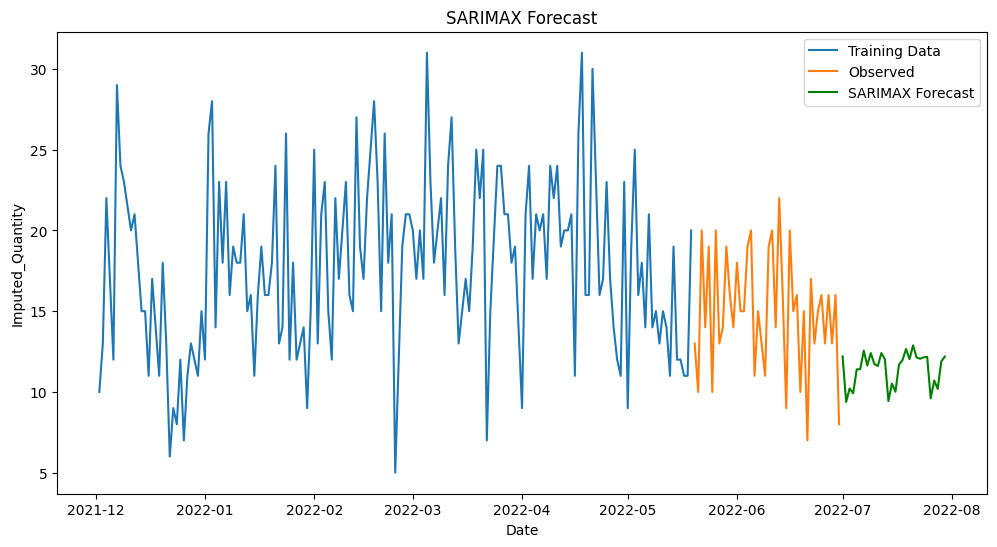

In [97]:
# Preprocessing (assuming Day Index is the correct column)
df['Day Index'] = pd.to_datetime(df['Day Index'], format='%Y-%m-%d')  # Modify format if needed
df.set_index('Day Index', inplace=True)

# Split data into train and test
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Assuming you have preprocessed exogenous variables for training and testing
train_exog = train[['Clicks', 'Impressions']]  # Replace with actual exogenous variables
test_exog = test[['Clicks', 'Impressions']]    # Replace with actual exogenous variables

# Fit SARIMAX model
sarimax_model = SARIMAX(train['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=train_exog)
sarimax_model_fit = sarimax_model.fit()

# Forecast for the future (e.g., 1 month ahead)
forecast_steps = 30  # Forecasting for 30 days
future_dates = pd.date_range(start=test.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Make forecasts for the future period using exogenous variables for the forecast period
# You need to provide the future exogenous variables for prediction
# Assuming you have some forecasted exogenous data (e.g., future clicks and impressions)
future_exog = pd.DataFrame({
    'Clicks': [100] * forecast_steps,  # Replace with actual future values
    'Impressions': [200] * forecast_steps  # Replace with actual future values
}, index=future_dates)

# Make predictions (forecast) using the SARIMAX model
sarimax_forecast = sarimax_model_fit.forecast(steps=forecast_steps, exog=future_exog)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Quantity'], label='Training Data')
plt.plot(test.index, test['Quantity'], label='Observed')
plt.plot(future_dates, sarimax_forecast, color='green', label='SARIMAX Forecast')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Imputed_Quantity')
plt.legend()
plt.show()